In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [113]:
df = pd.read_csv("Automobile_data.csv",dtype={'price':'Int64'},na_values=['?',np.NAN])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [114]:
df.dropna(axis=0,inplace=True)

# EDA

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    float64
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

In [5]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [93]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Univariate Analysis

In [100]:
numerical = df.select_dtypes(exclude='object')
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  164 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    float64
 7   engine-size        205 non-null    float64
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak-rpm           203 non-null    float64
 13  city-mpg           205 non-null    float64
 14  highway-mpg        205 non-null    float64
 15  price              201 non-null    Int64  
dtypes: Int64(1), float64(15)
m

In [101]:
categorical = df.select_dtypes(include='object')
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              205 non-null    object
 1   fuel-type         205 non-null    object
 2   aspiration        205 non-null    object
 3   num-of-doors      203 non-null    object
 4   body-style        205 non-null    object
 5   drive-wheels      205 non-null    object
 6   engine-location   205 non-null    object
 7   engine-type       205 non-null    object
 8   num-of-cylinders  205 non-null    object
 9   fuel-system       205 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


In [13]:
def plot_categorical_values(df):
    for i in df:
        fig,ax = plt.subplots(1,1,figsize=(25,10))
        sns.countplot(x=df[i],data=df,order=df[i].value_counts().index)

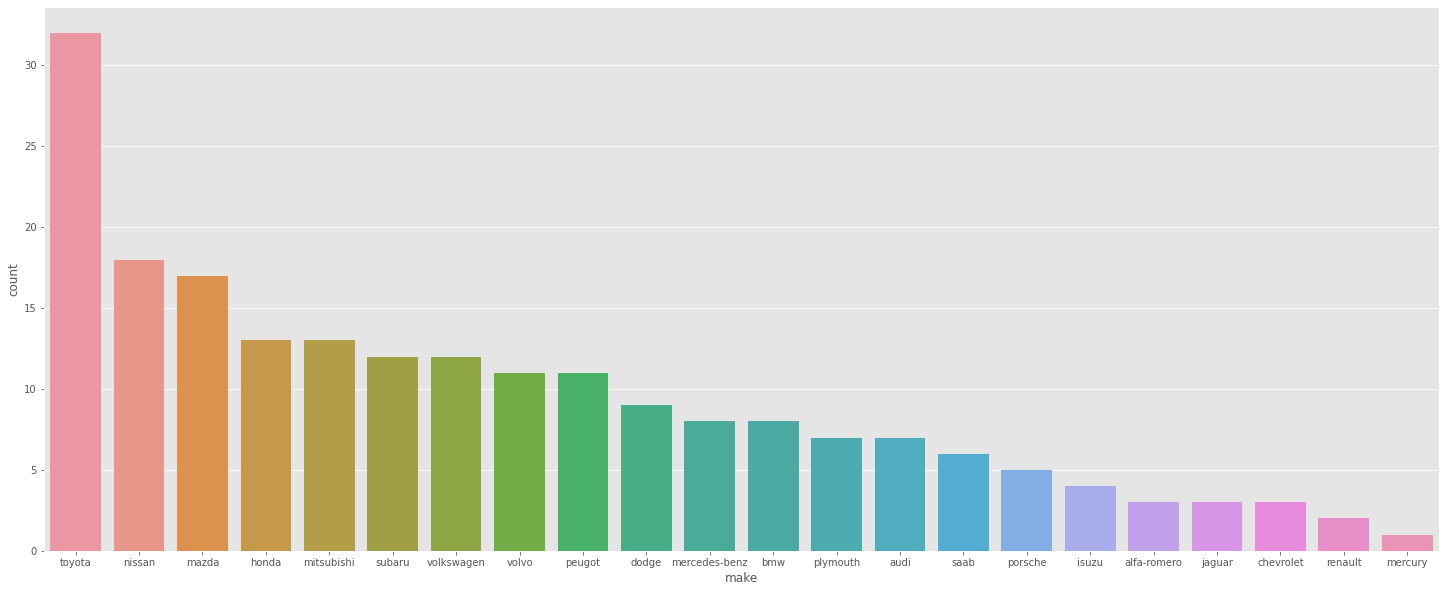

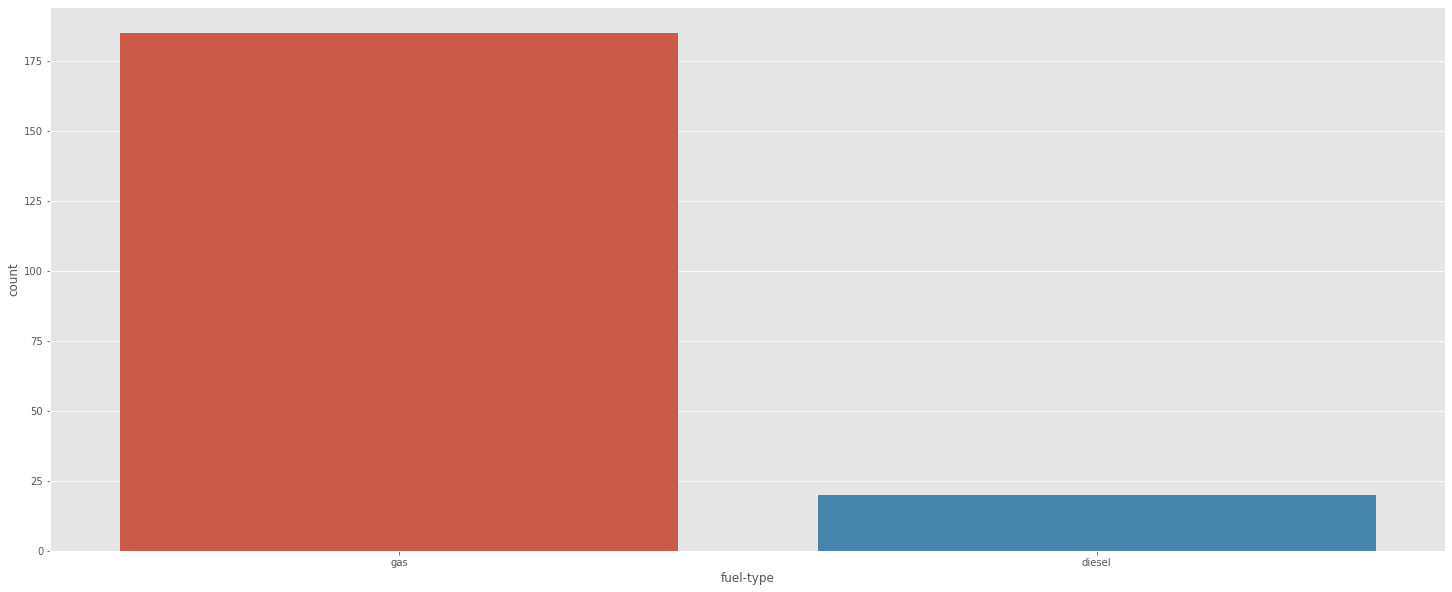

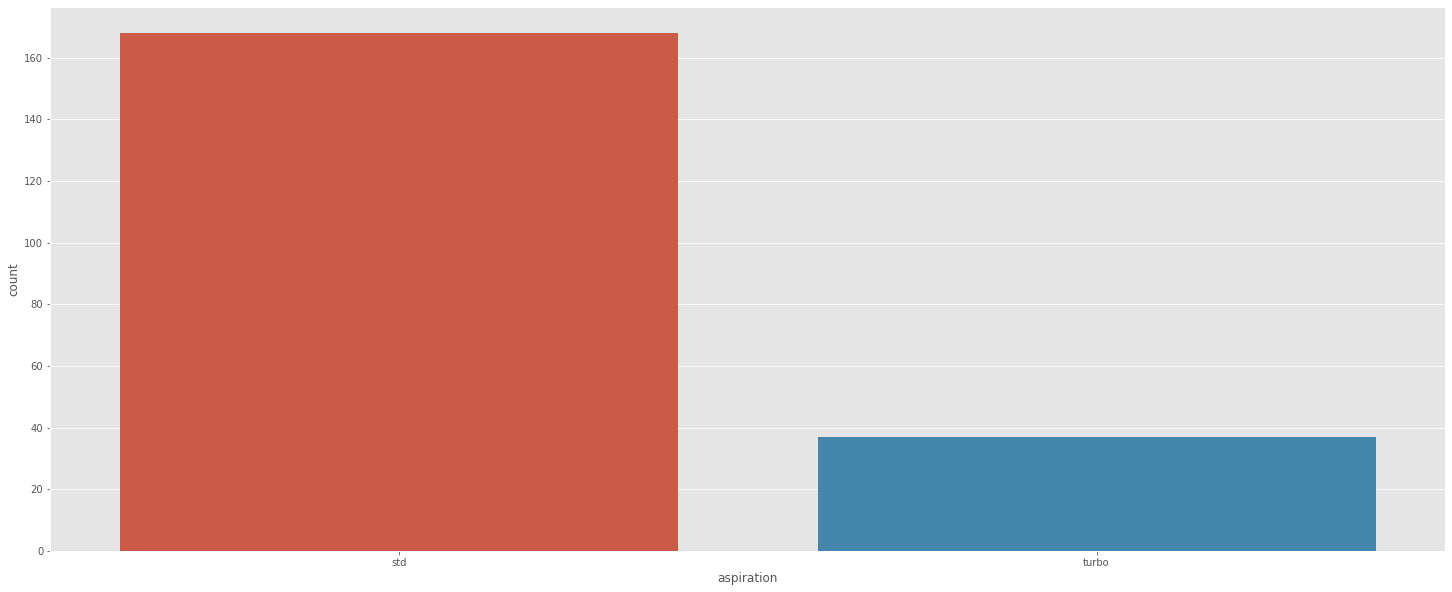

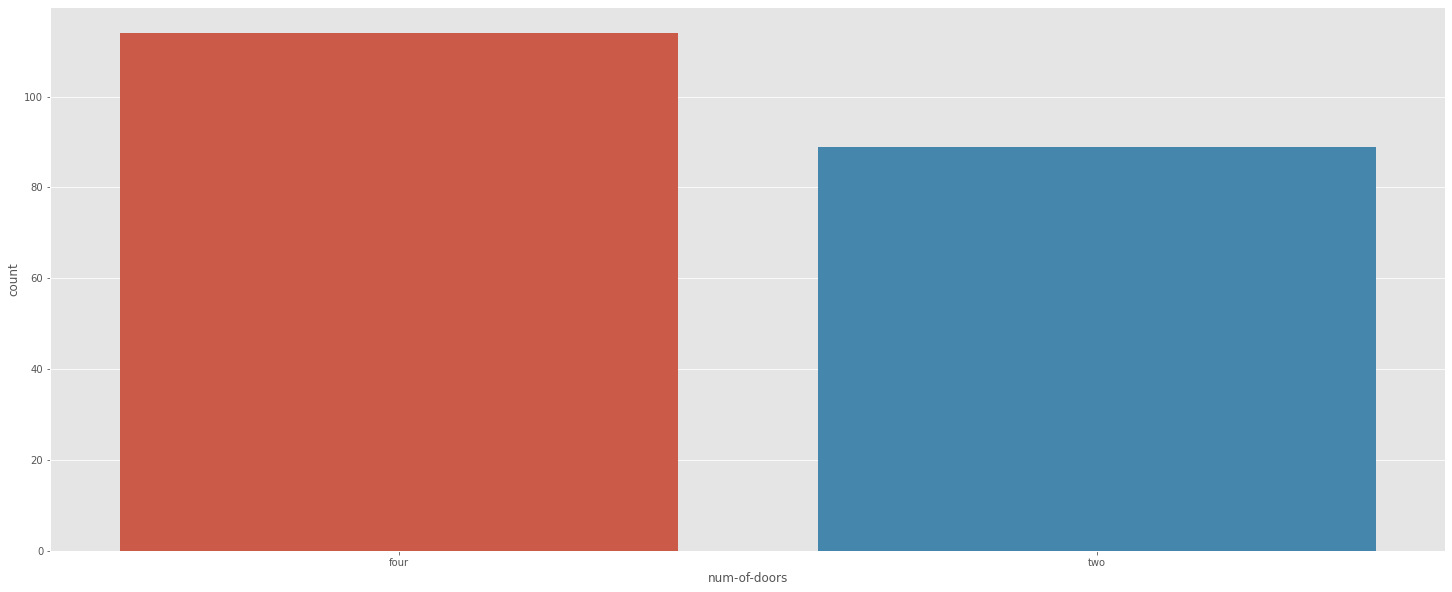

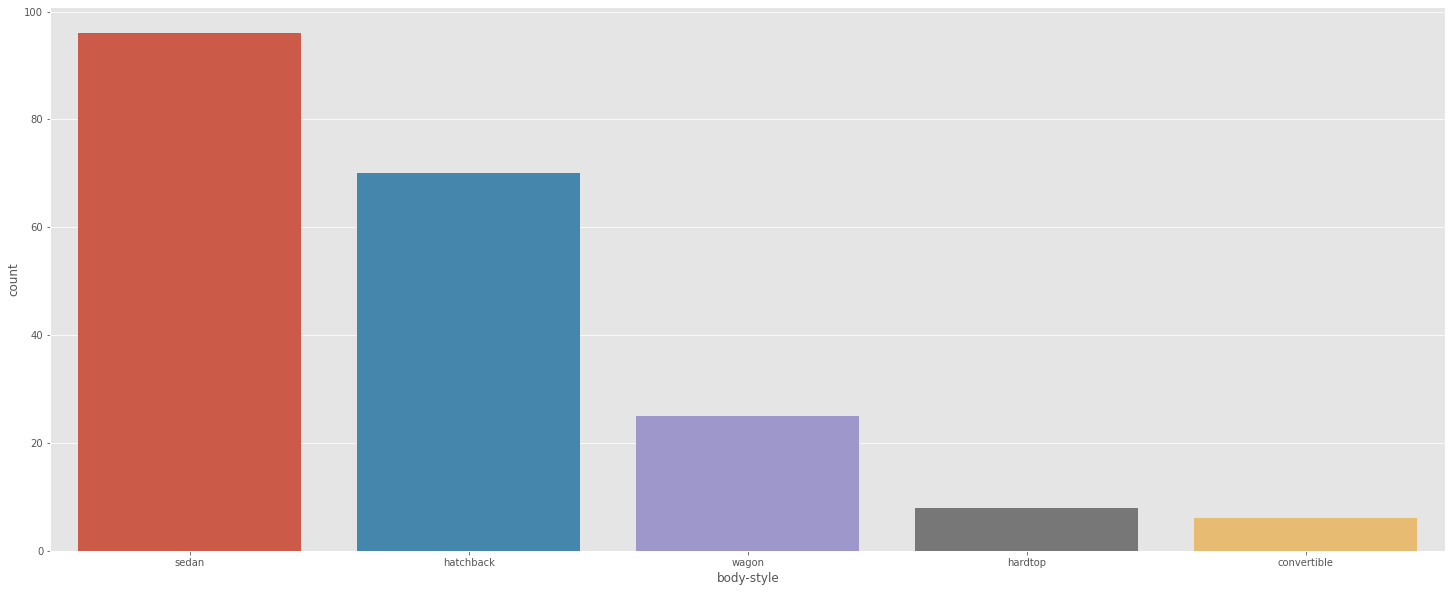

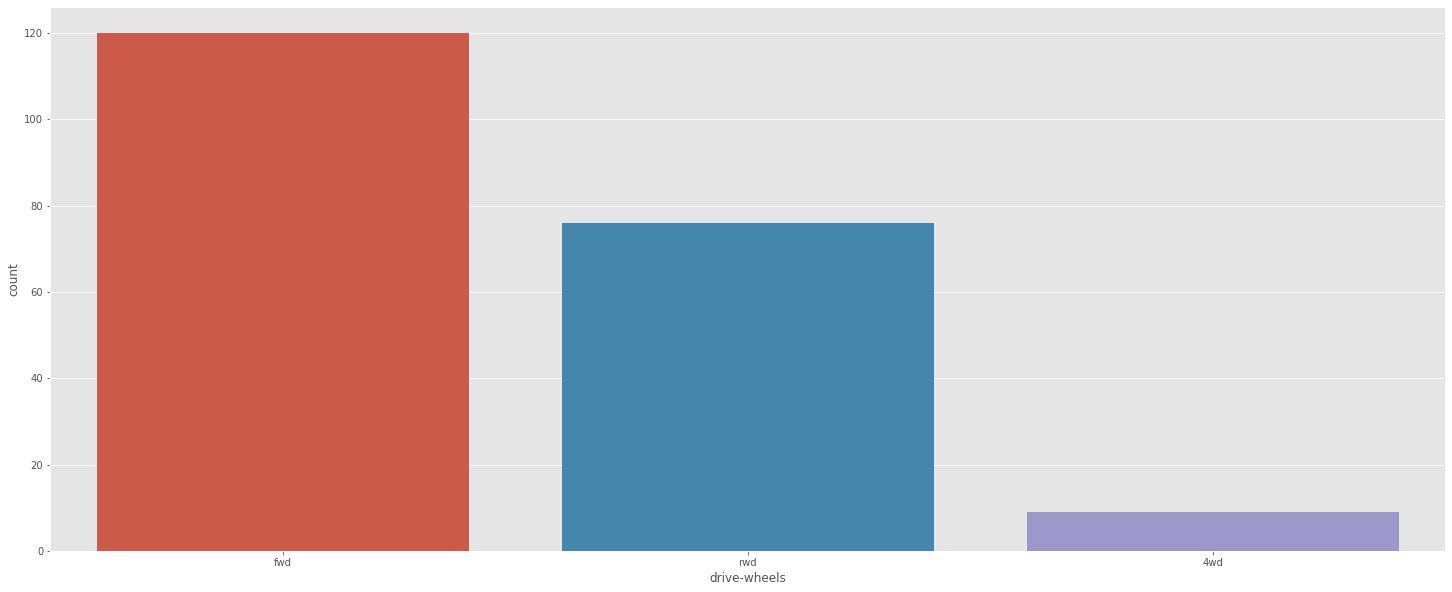

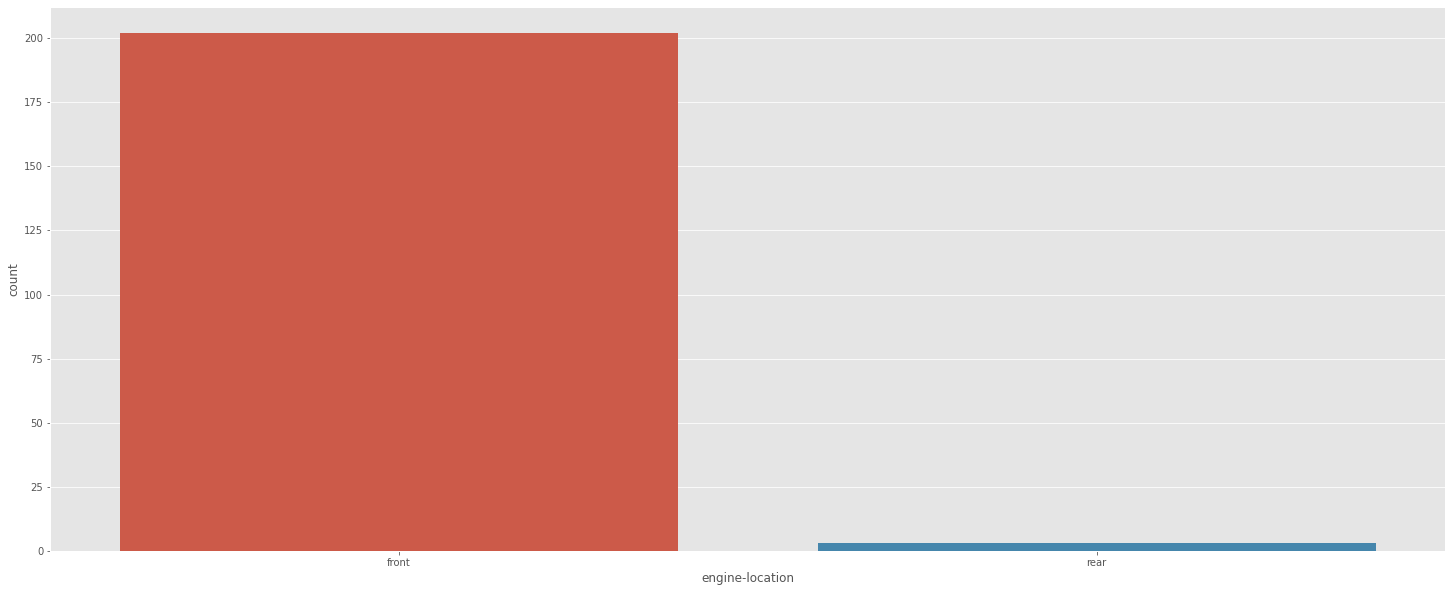

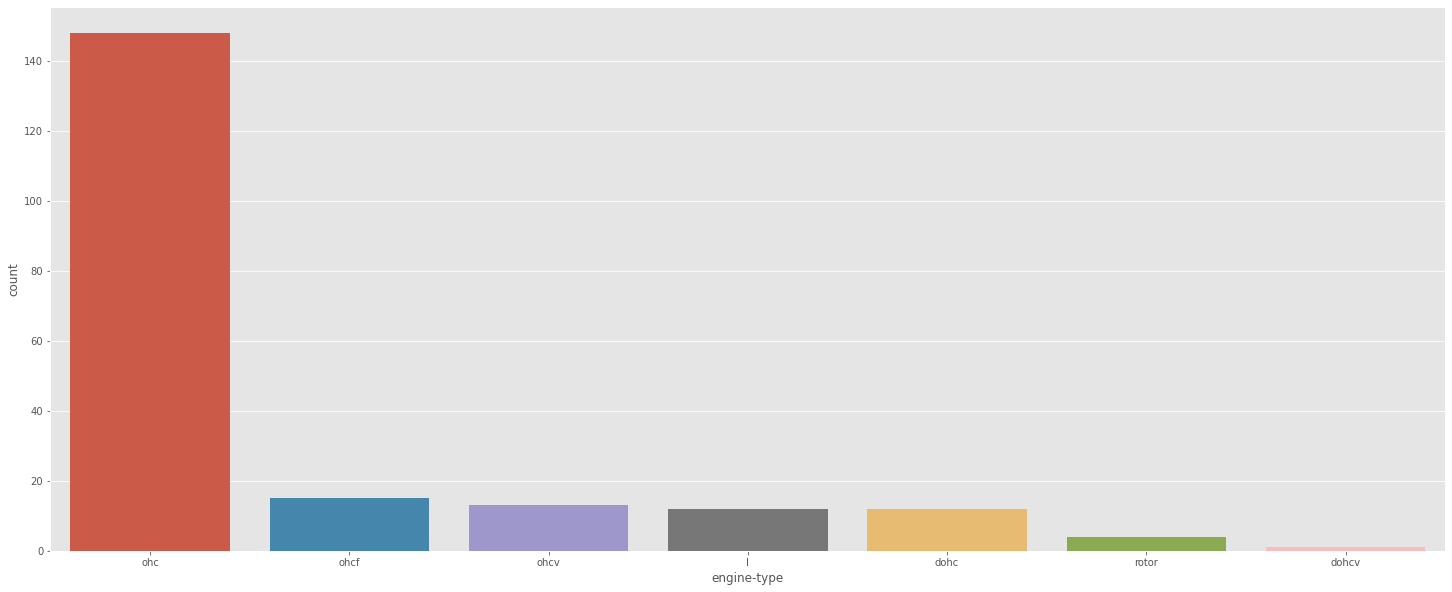

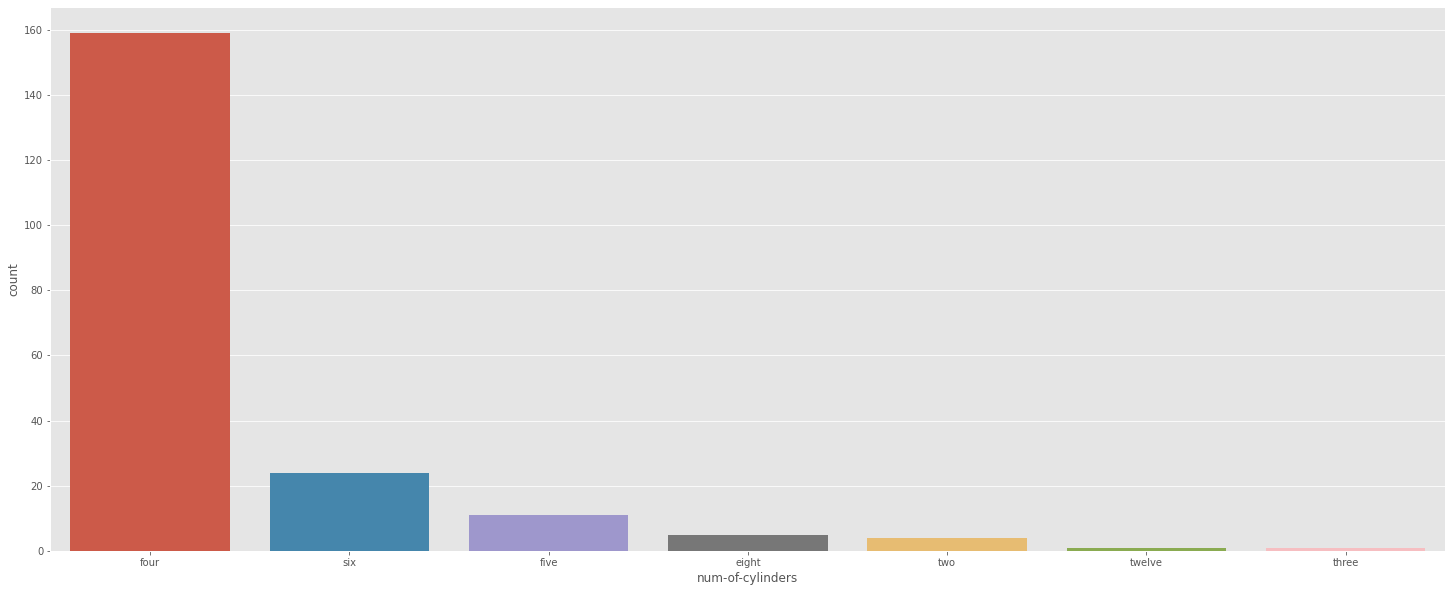

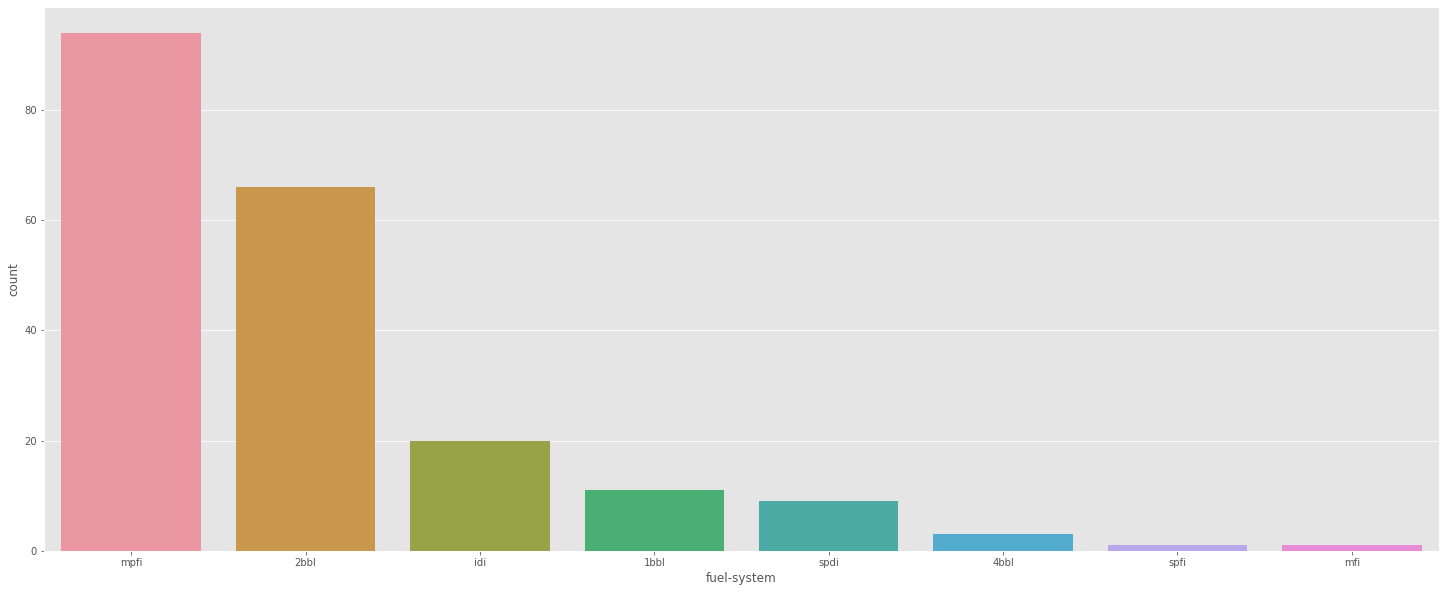

In [14]:
plot_categorical_values(categorical)

### Bivariate Analysis

In [57]:
## Relationship with price

def plot_categorical_values(df,categorical):
    for i in categorical:
        fig,ax = plt.subplots(1,1,figsize=(25,10))
        result = df.groupby([i])['price'].aggregate(np.median).reset_index().sort_values('price')
        sns.barplot(x=categorical[i], y=df.price, order=result[i])


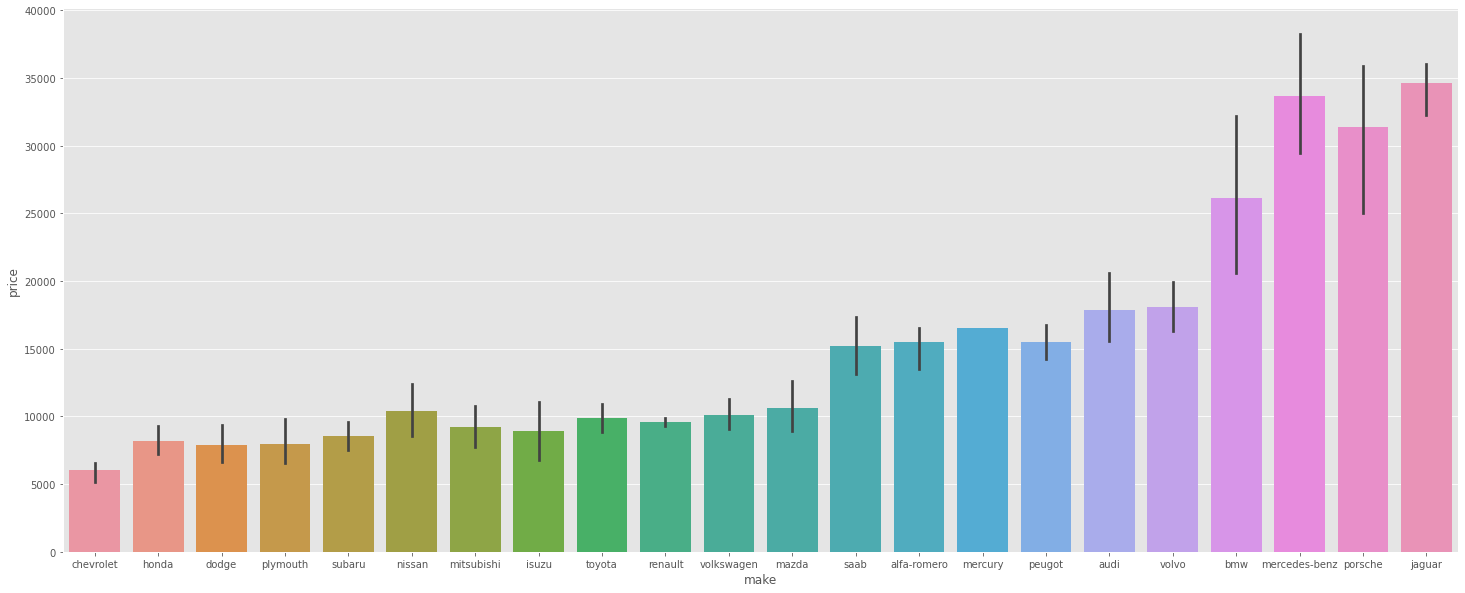

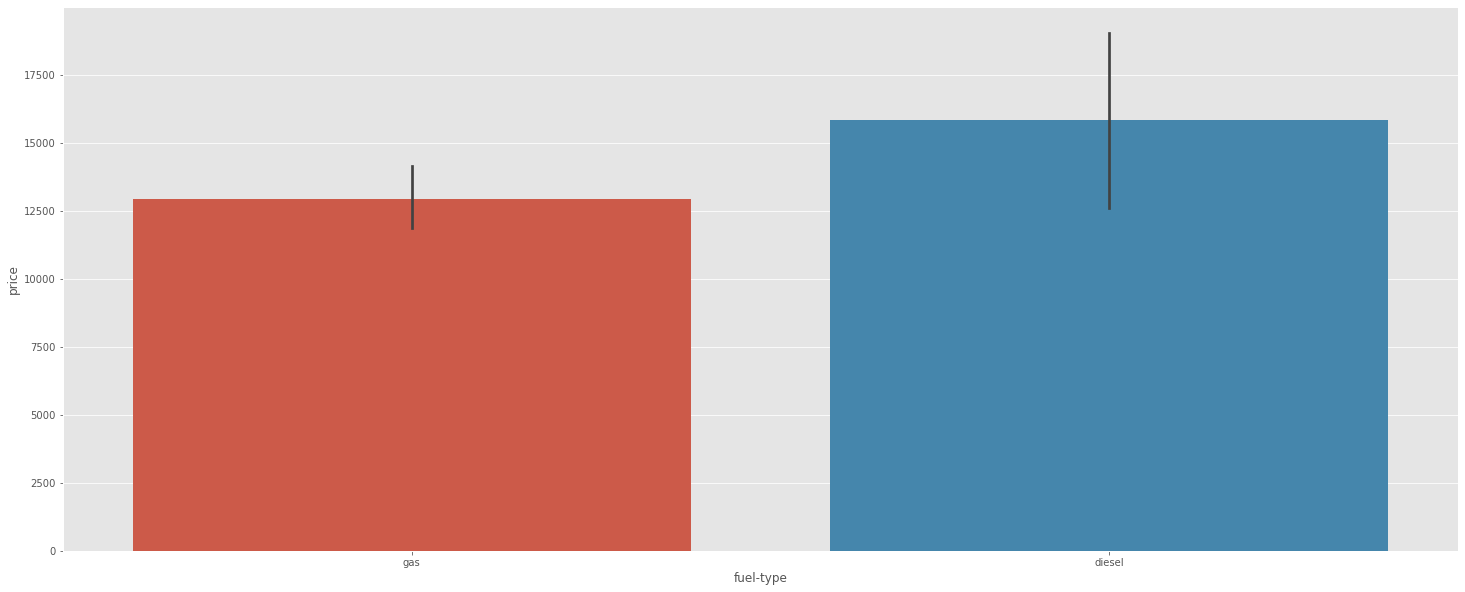

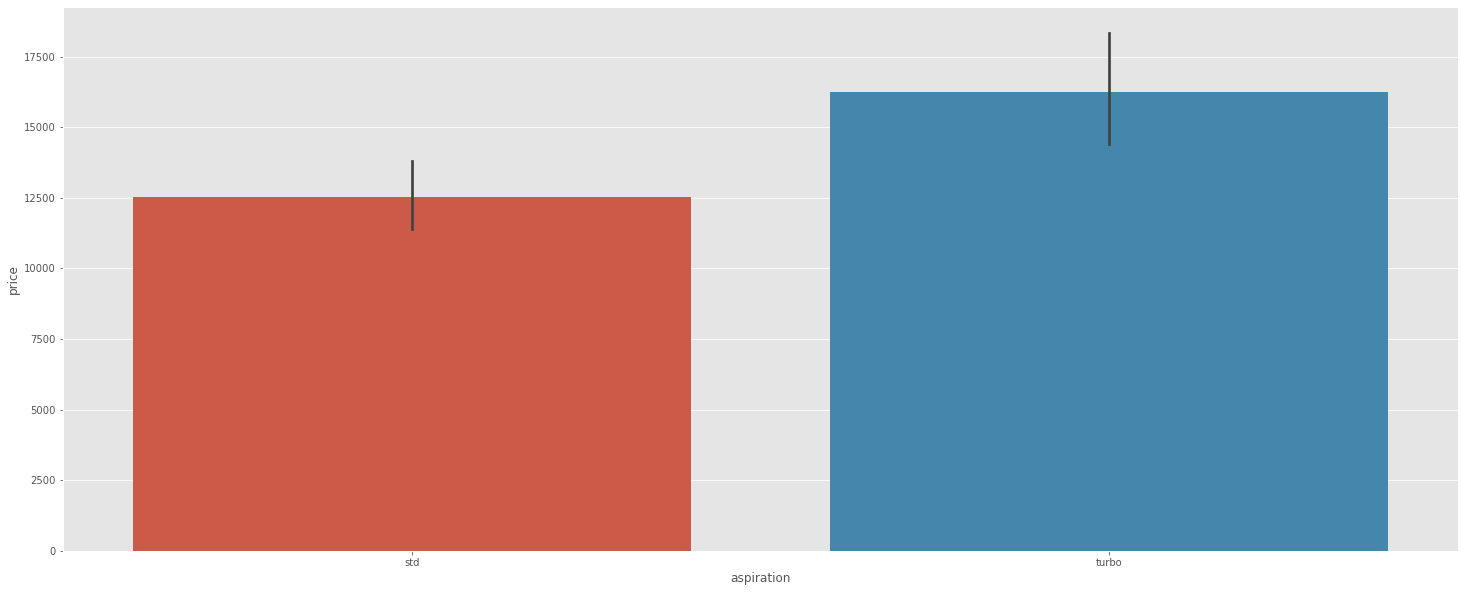

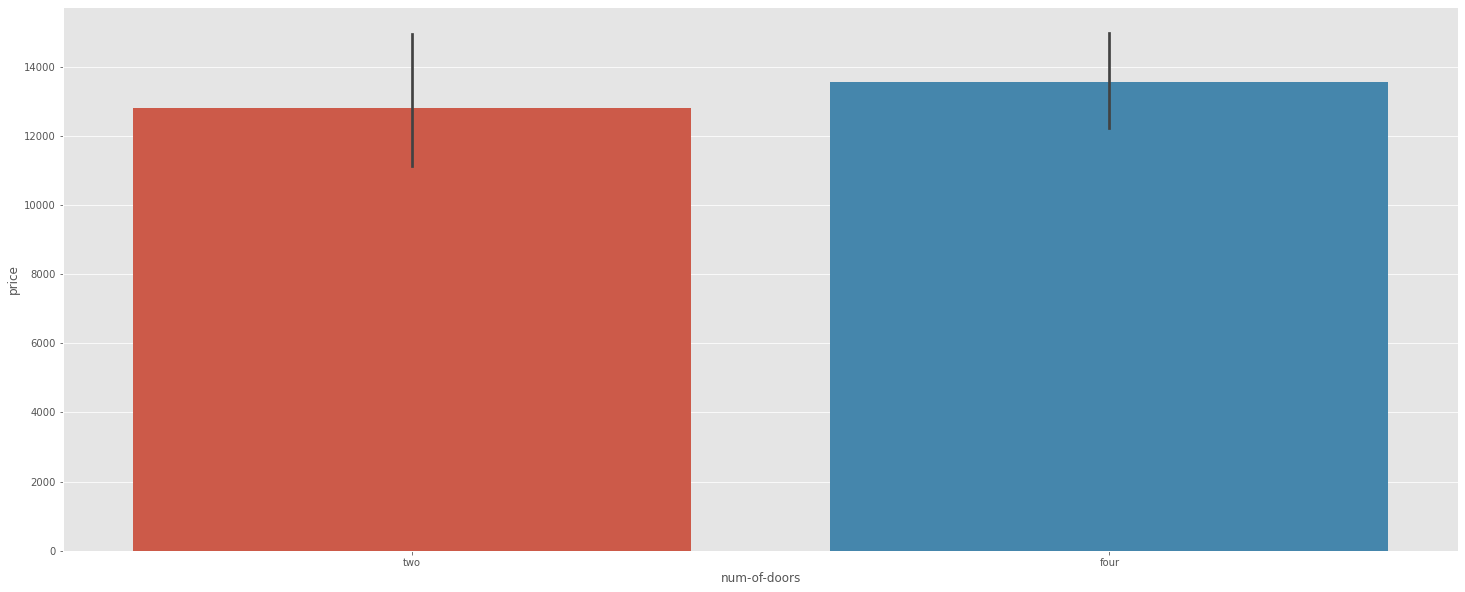

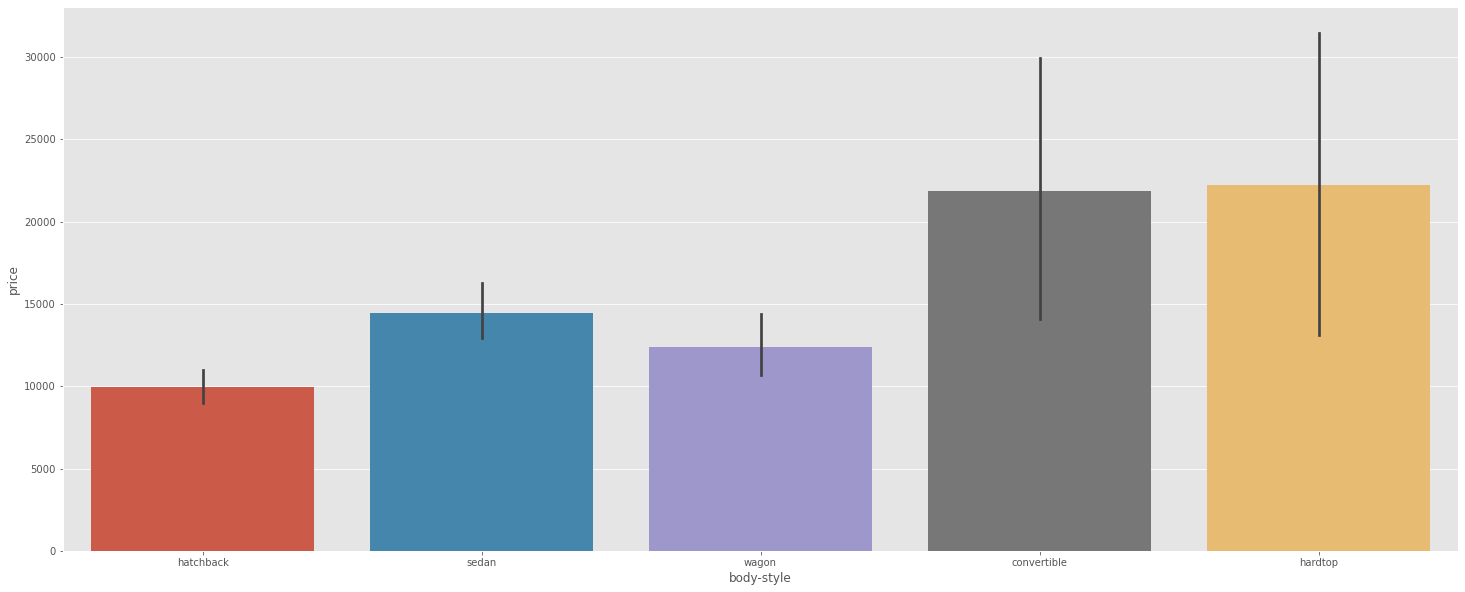

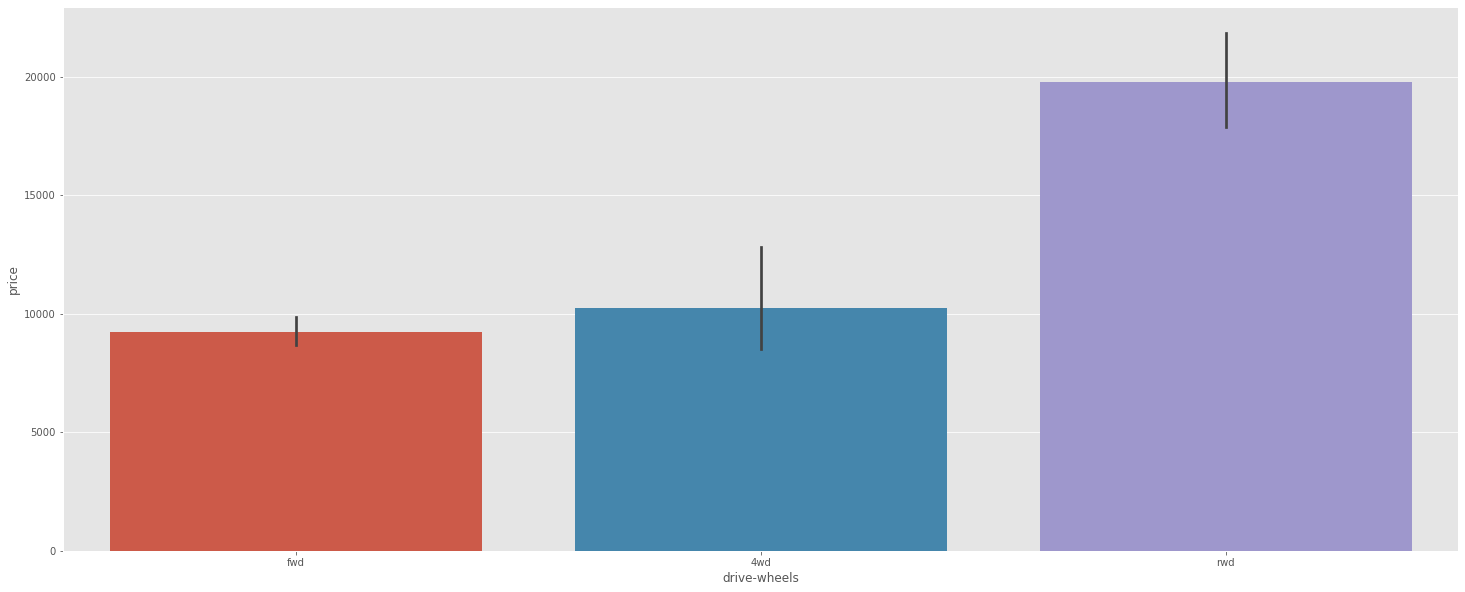

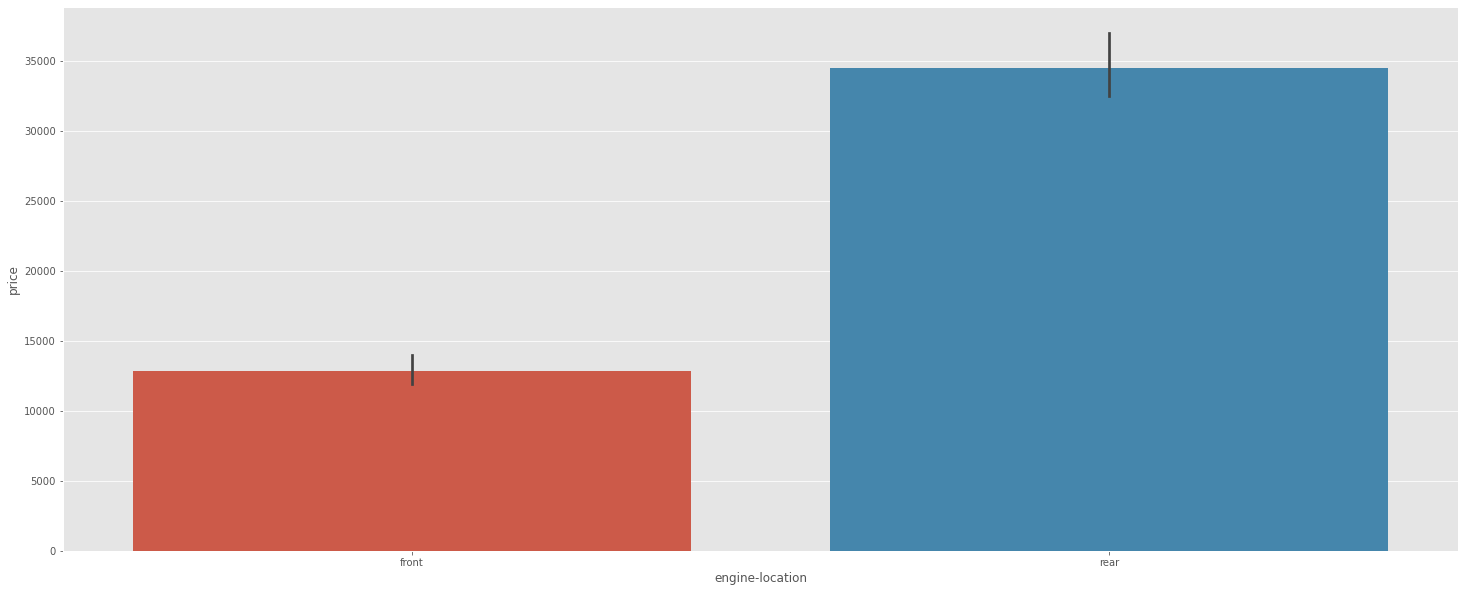

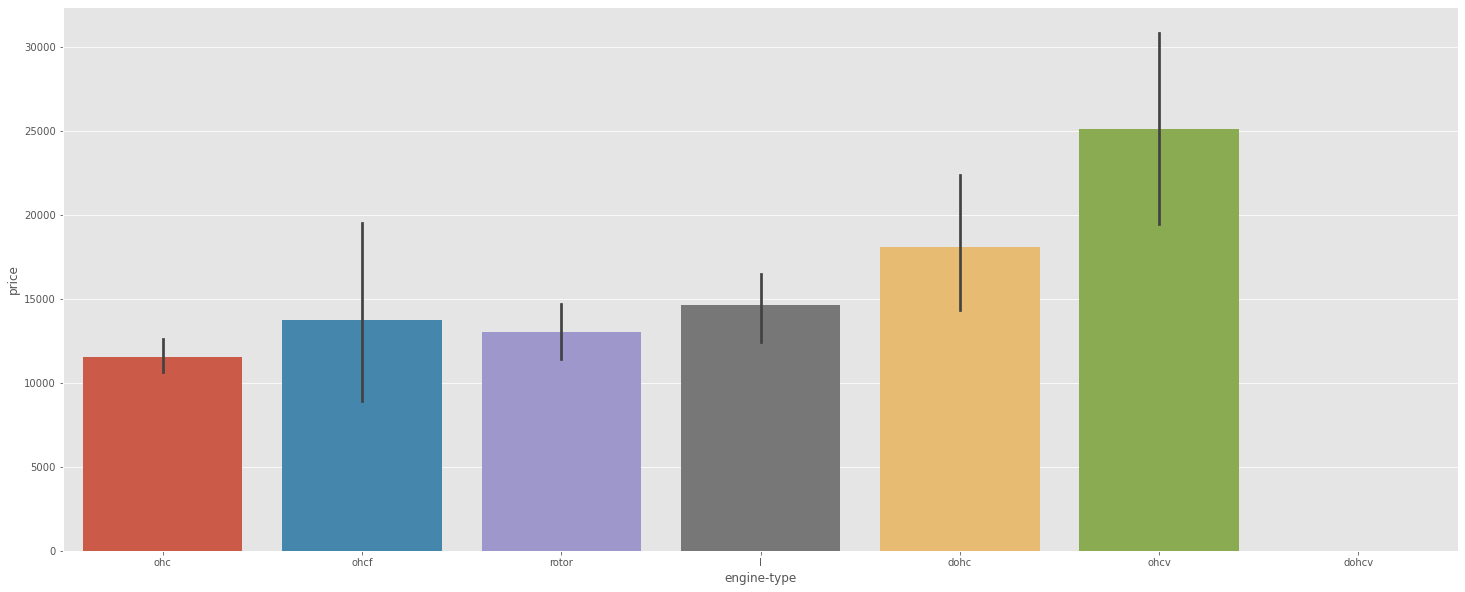

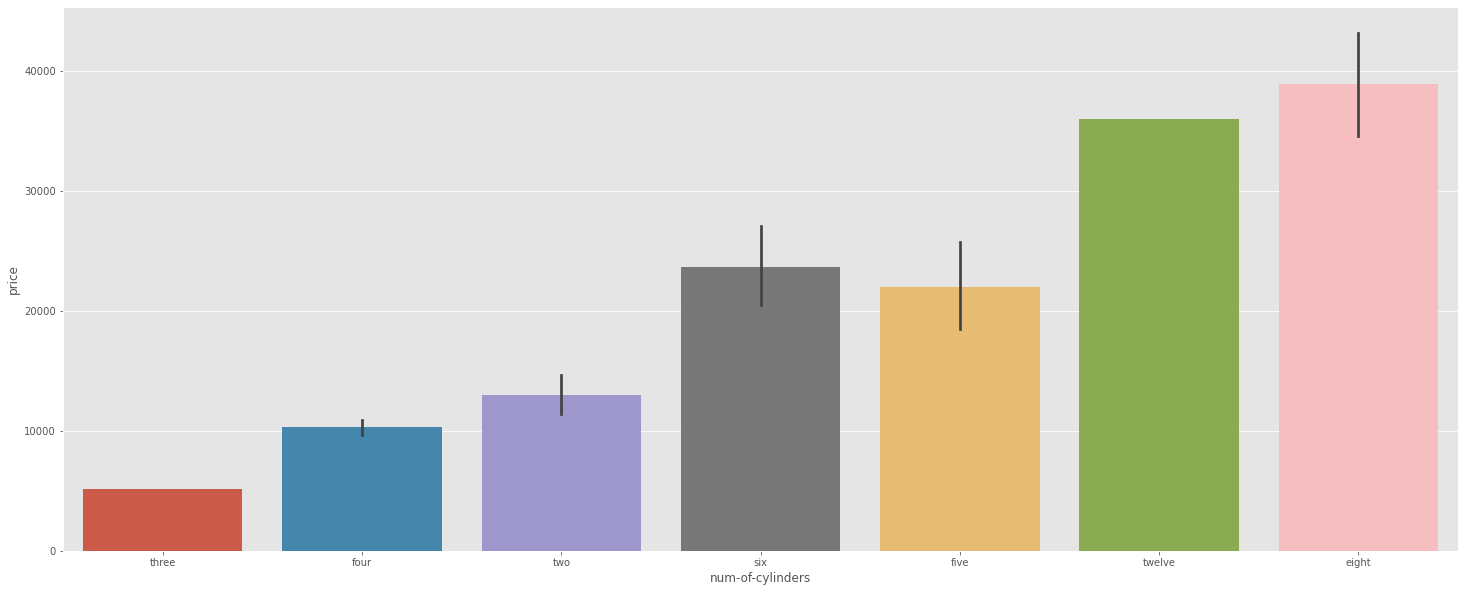

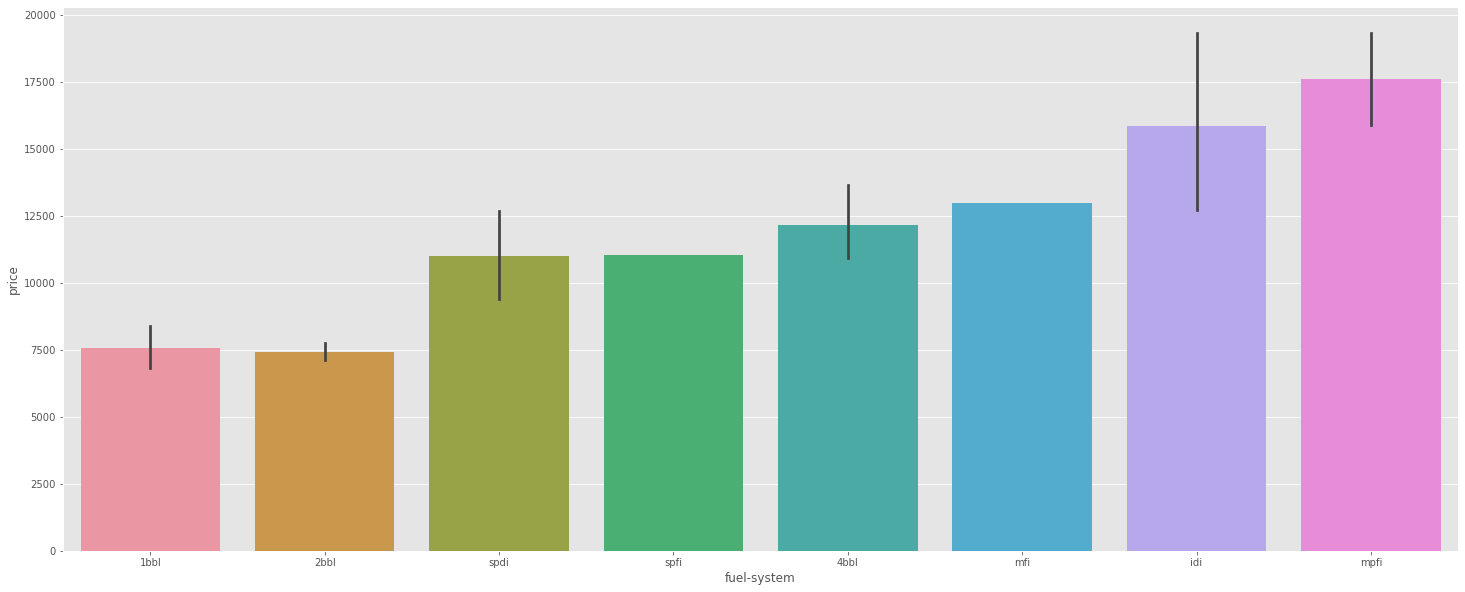

In [58]:
plot_categorical_values(df,categorical)

In [54]:
categorical.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [52]:
pd.crosstab(df.make,df['fuel-type'])

fuel-type,diesel,gas
make,,
alfa-romero,0,3
audi,0,7
bmw,0,8
chevrolet,0,3
dodge,0,9
honda,0,13
isuzu,0,4
jaguar,0,3
mazda,2,15


In [53]:
pd.crosstab(df.make,df['num-of-doors'])

num-of-doors,four,two
make,,
alfa-romero,0,3
audi,5,2
bmw,5,3
chevrolet,1,2
dodge,4,4
honda,5,8
isuzu,2,2
jaguar,2,1
mazda,7,9


In [12]:
def check_outlier_numerical_values(df):
    for i in df:
        fig,ax = plt.subplots(1,1,figsize=(25,10))
        sns.boxplot(x=df[i],data=df,order=df[i].value_counts().index)

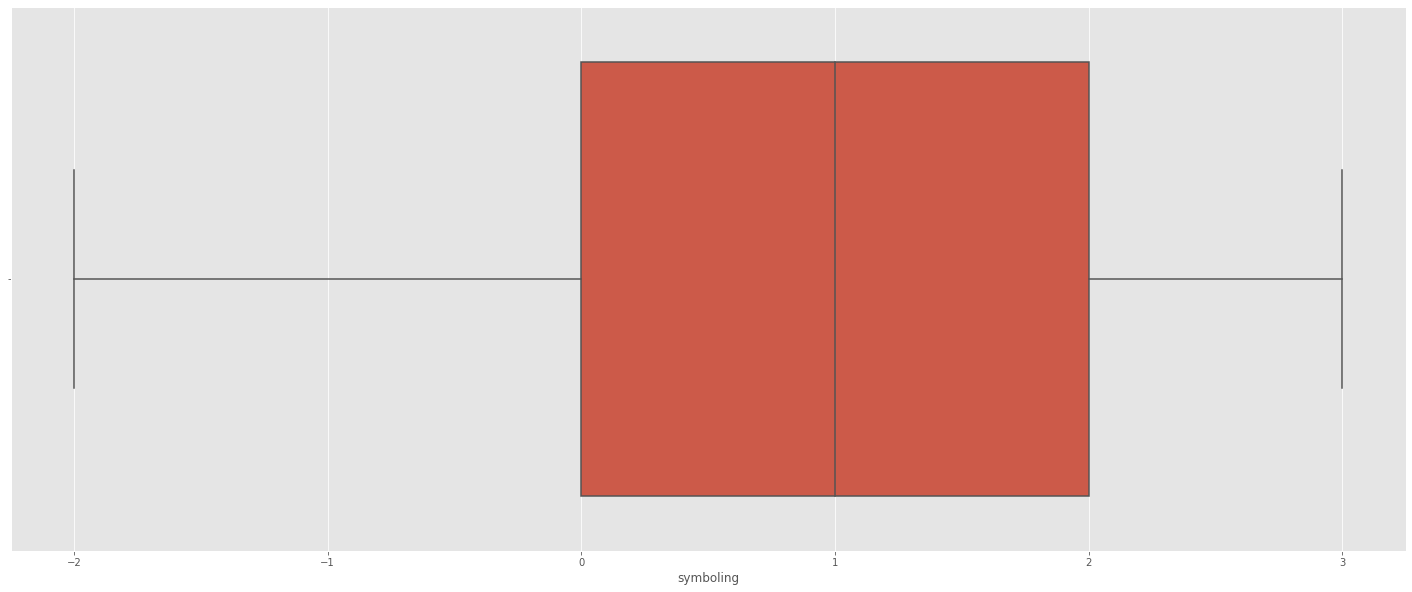

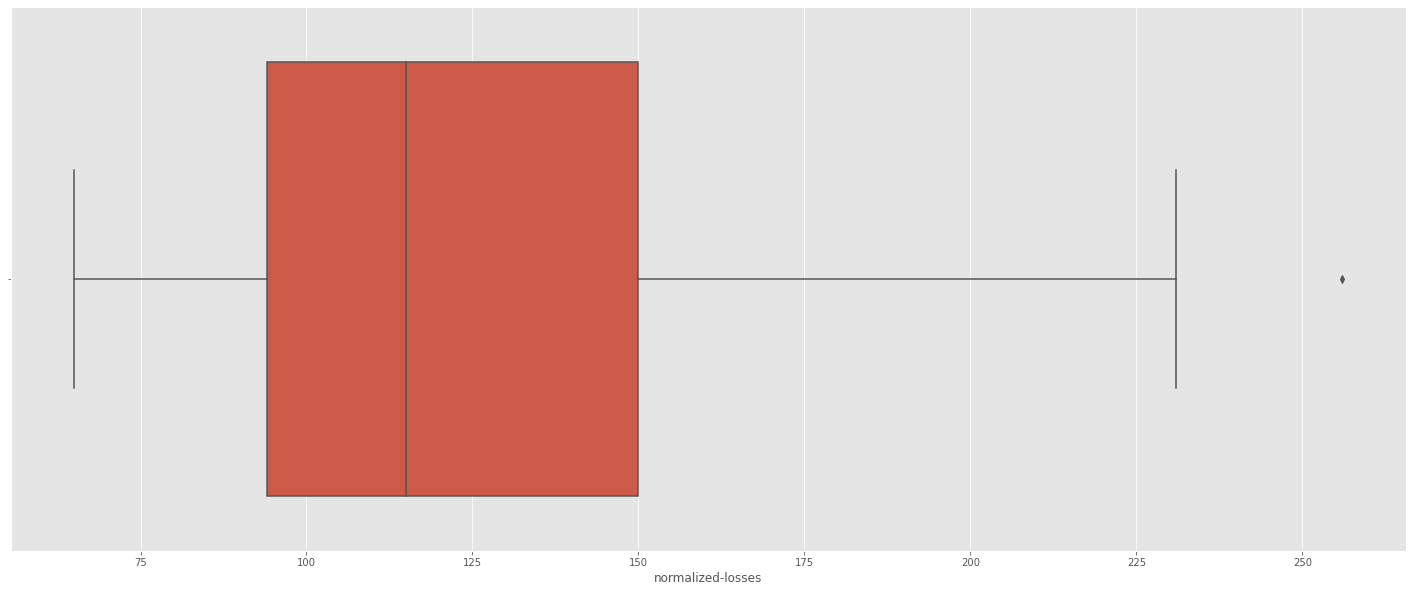

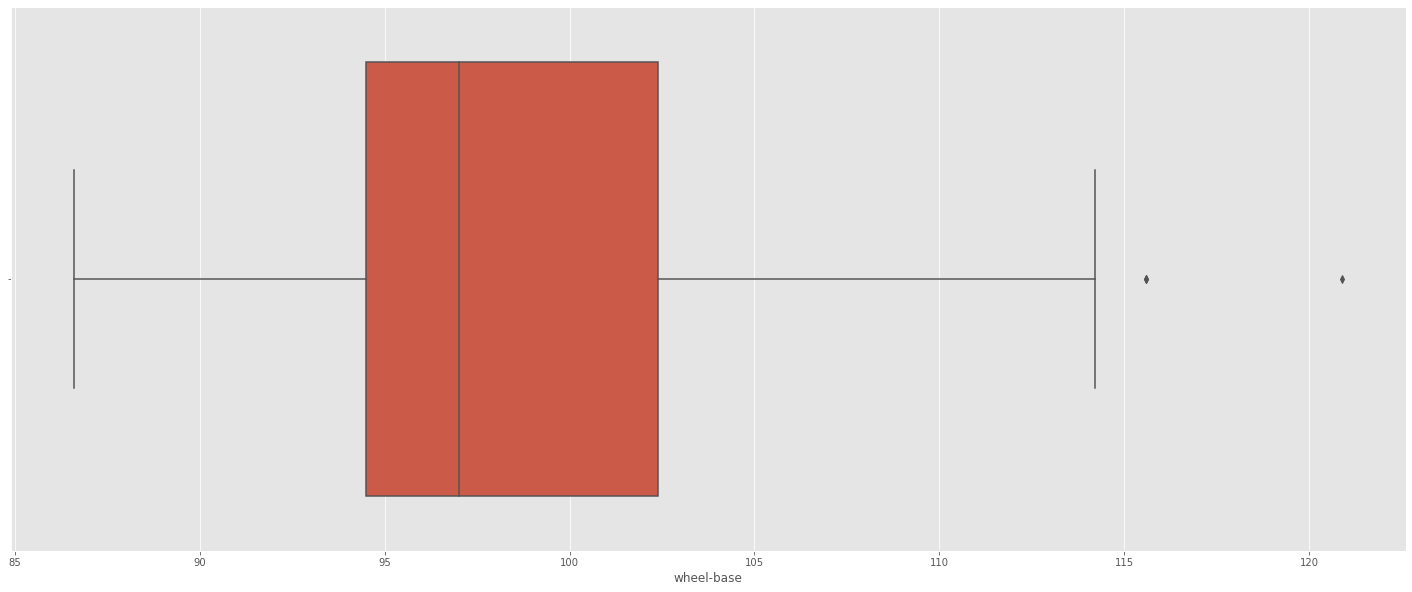

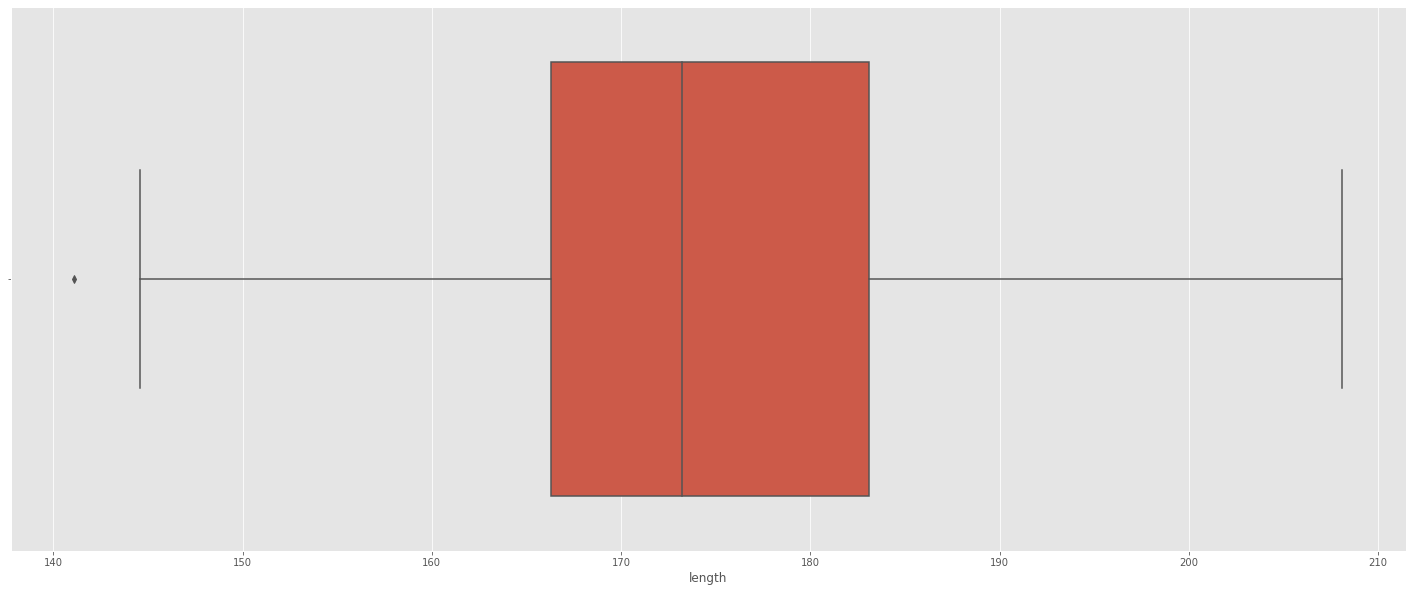

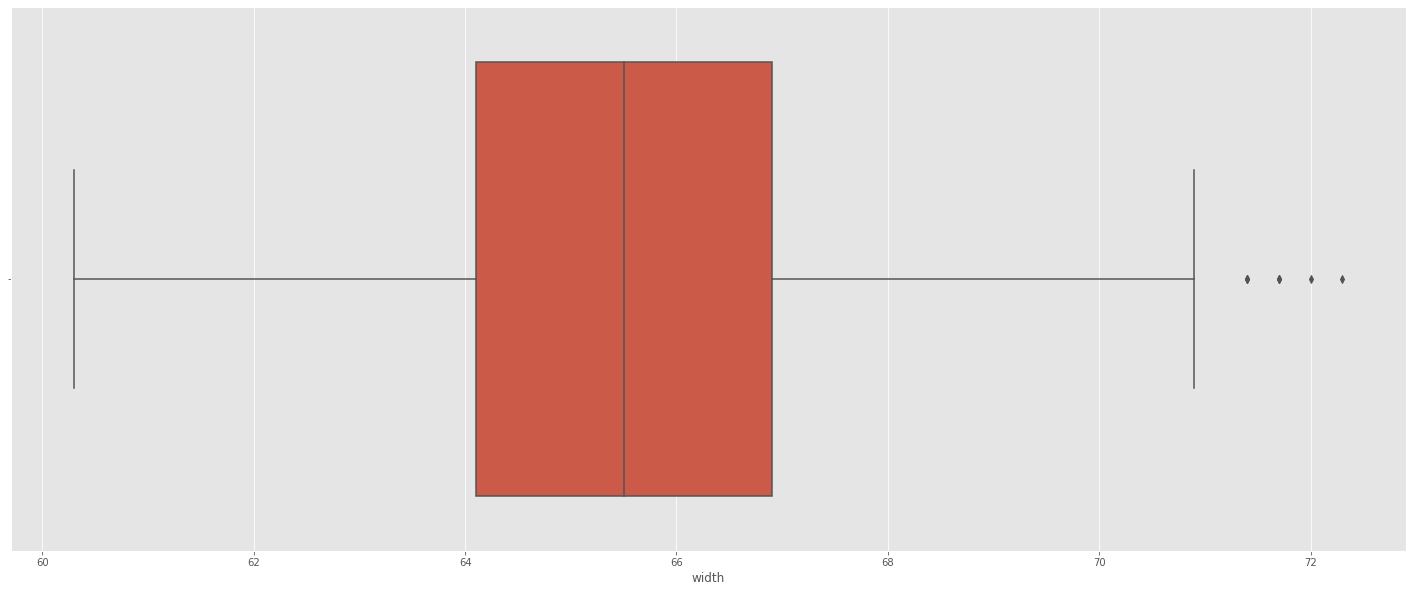

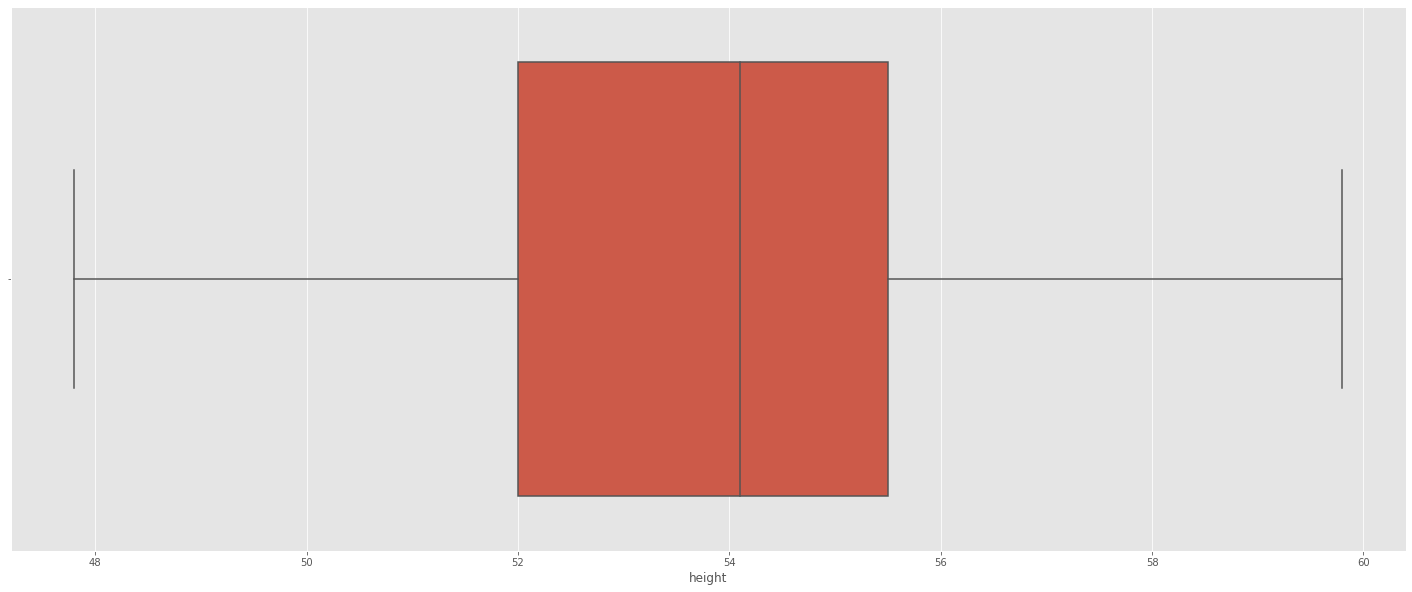

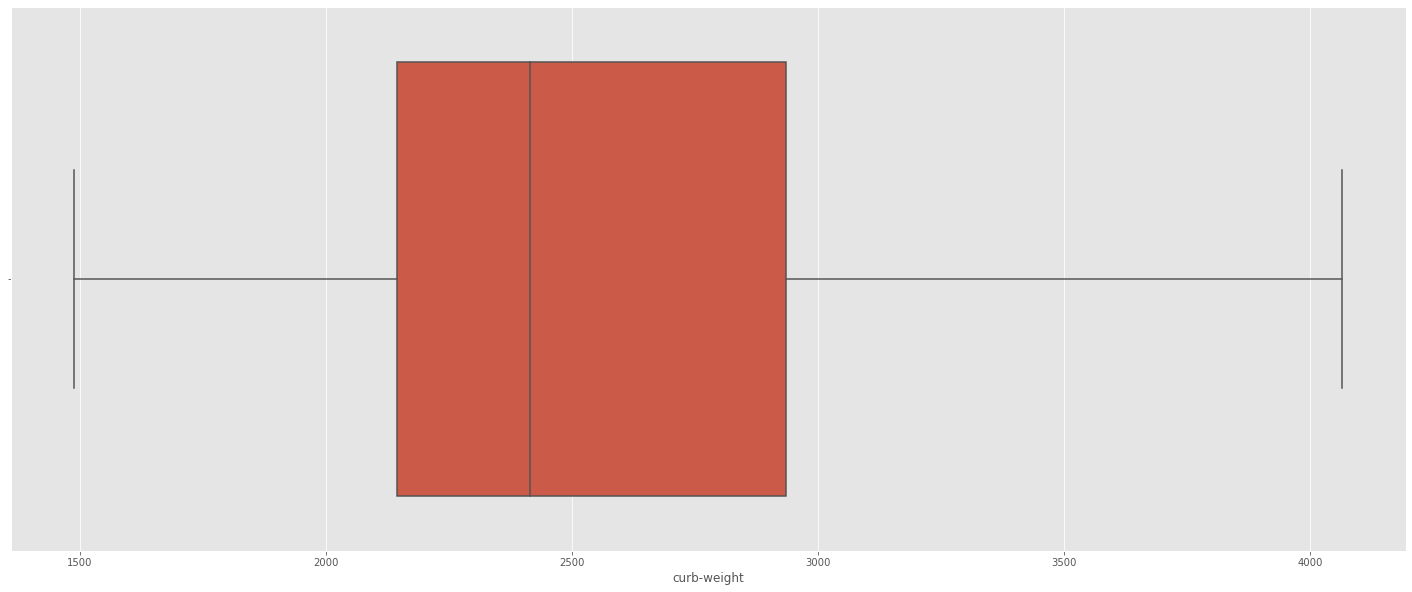

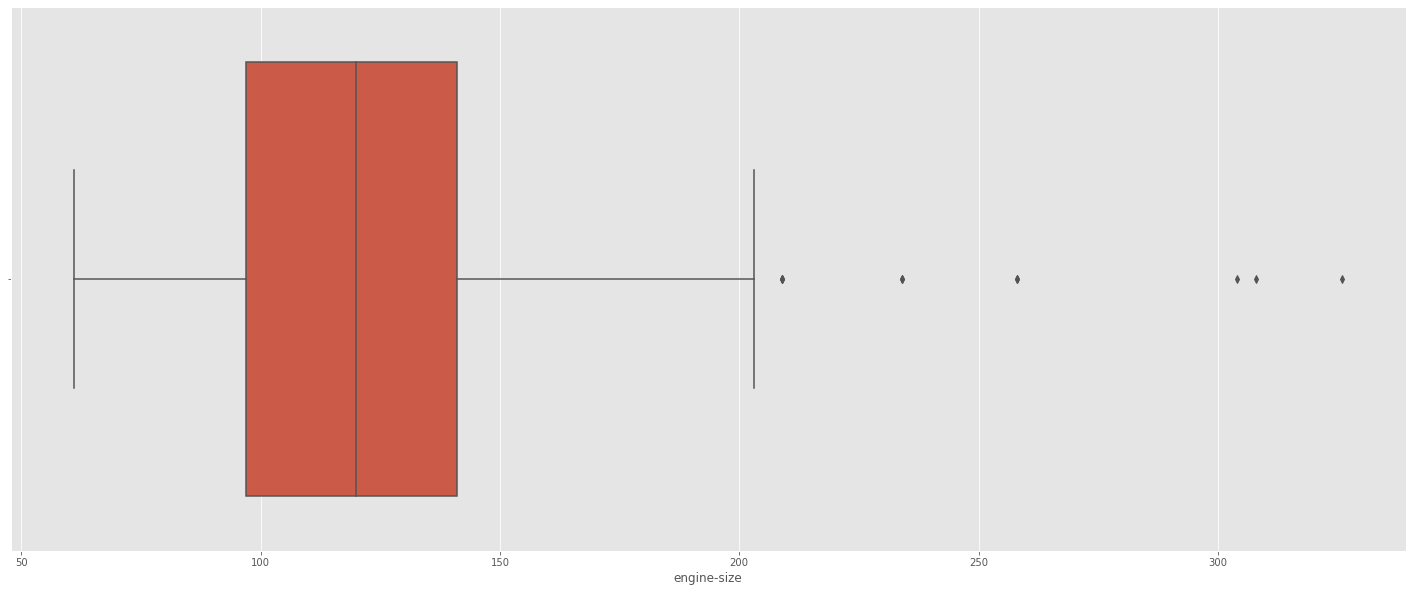

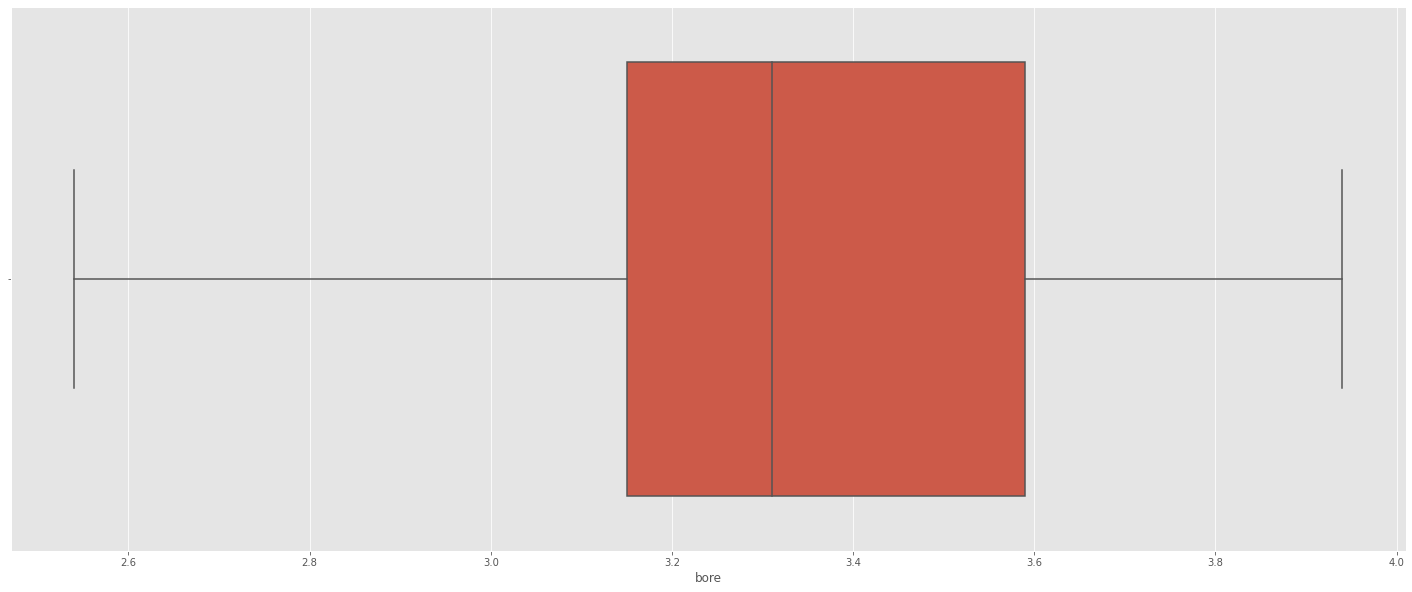

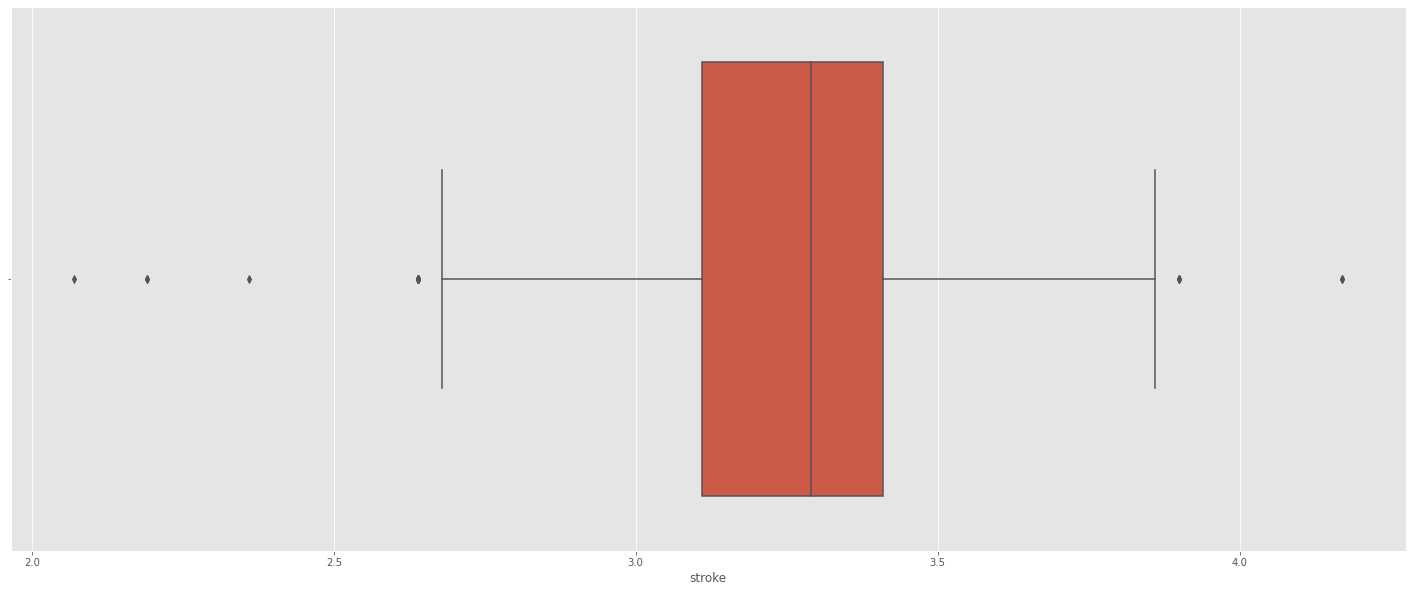

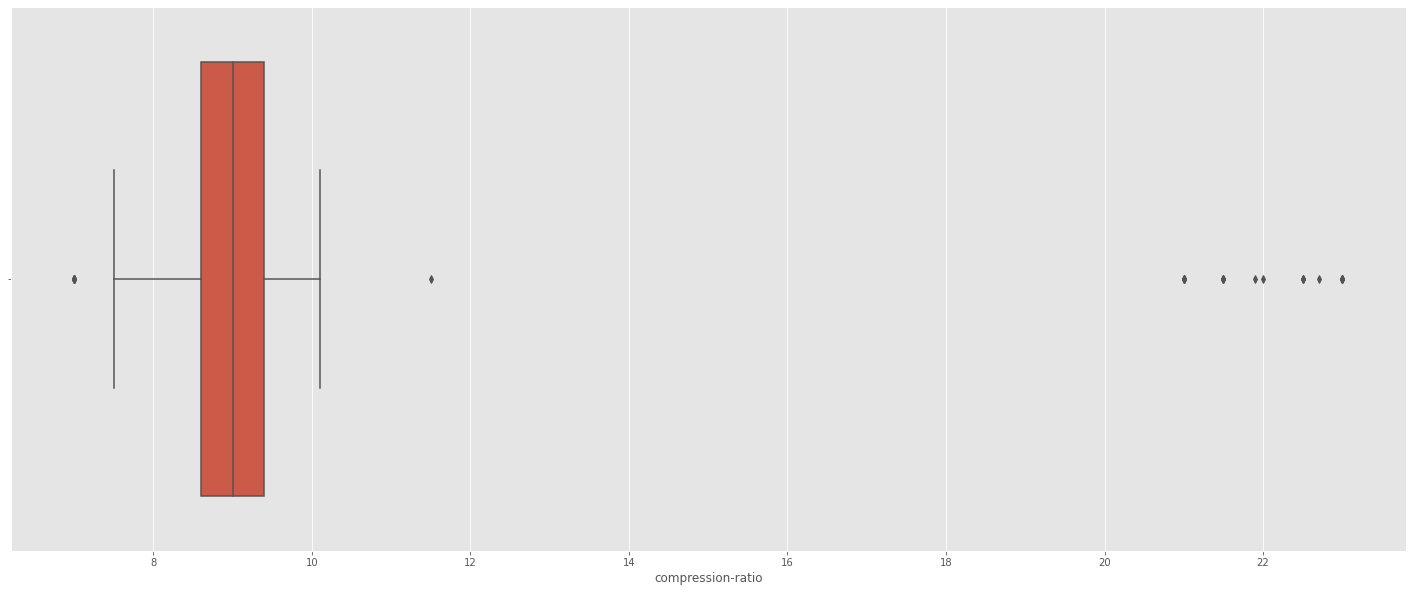

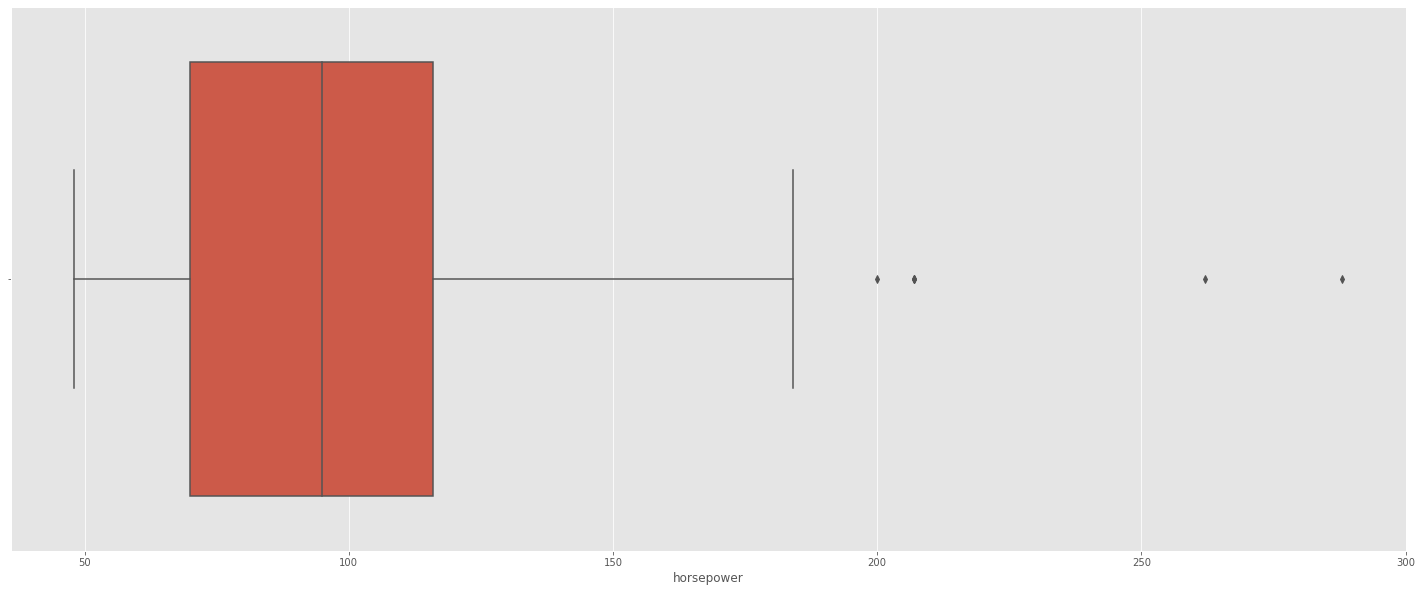

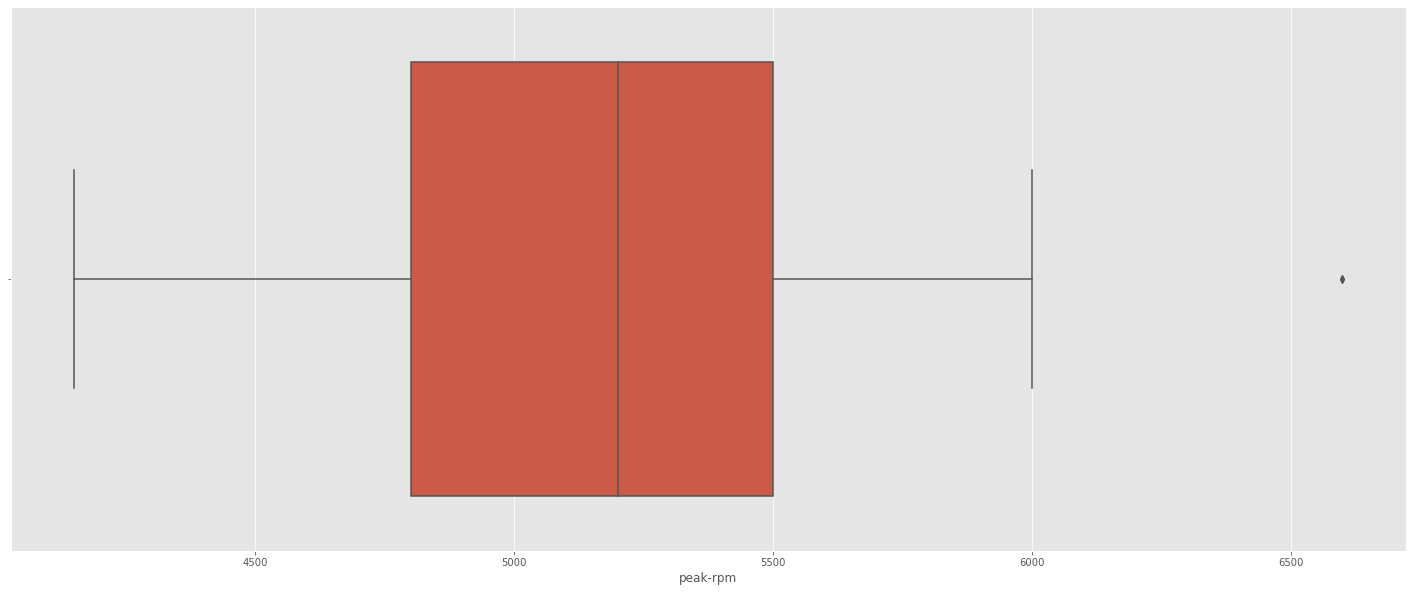

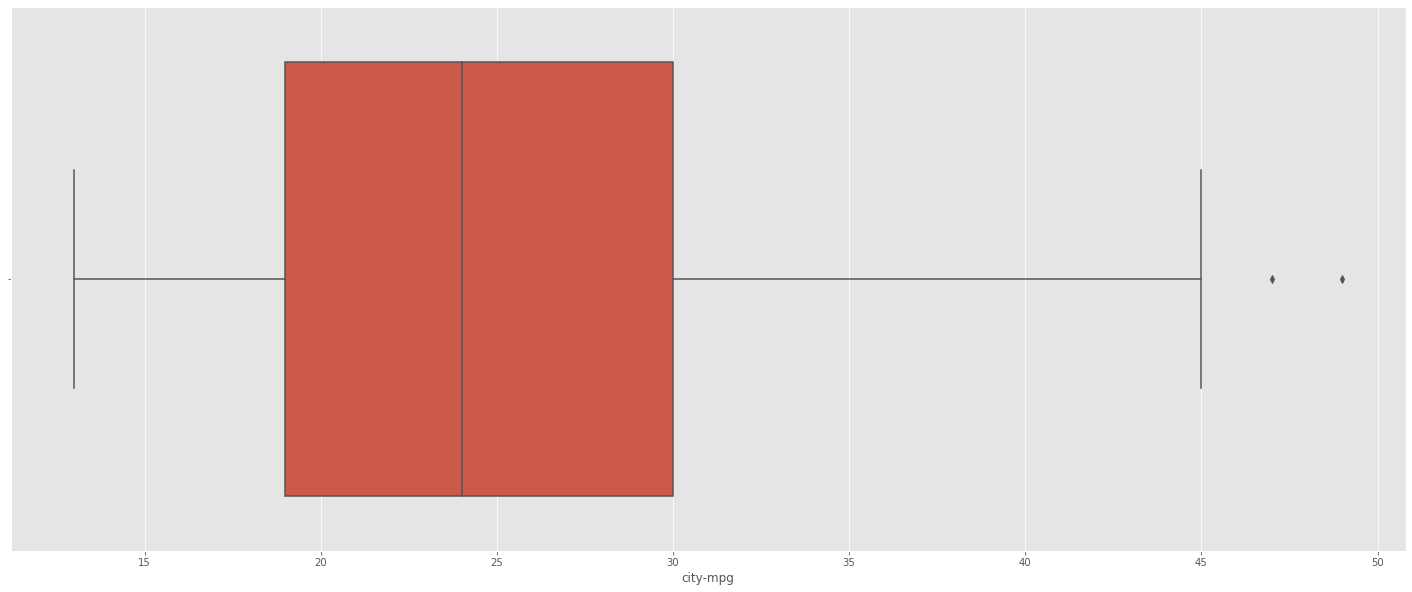

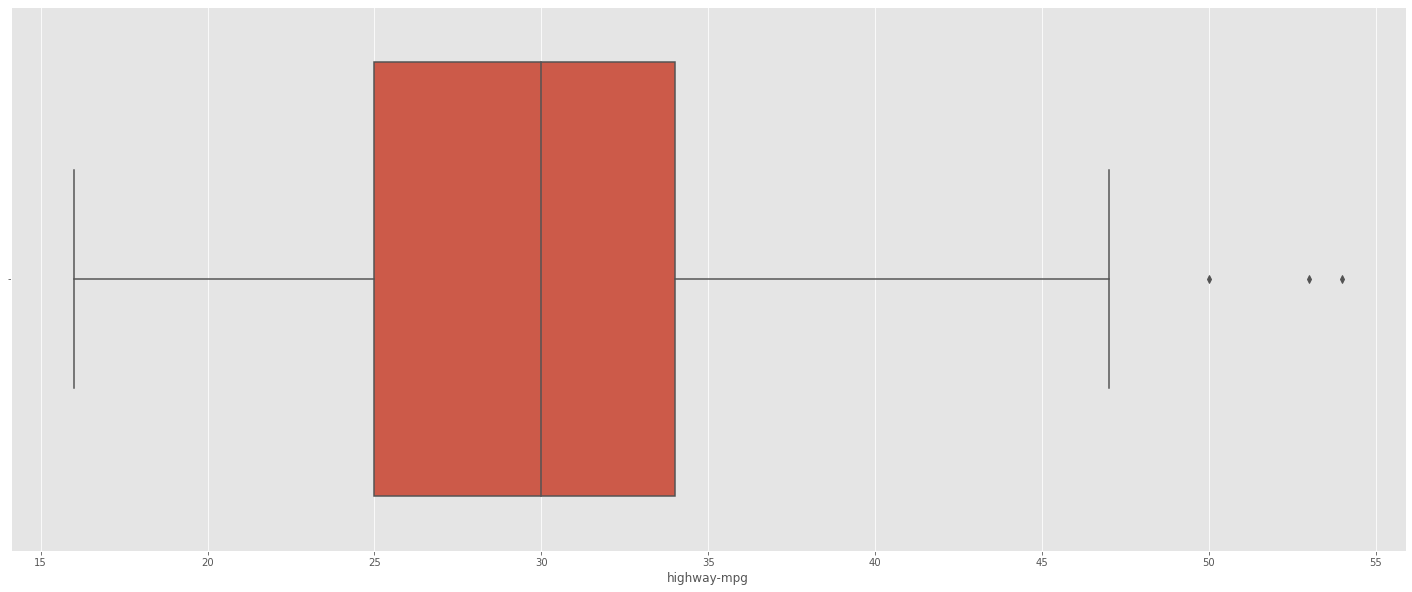

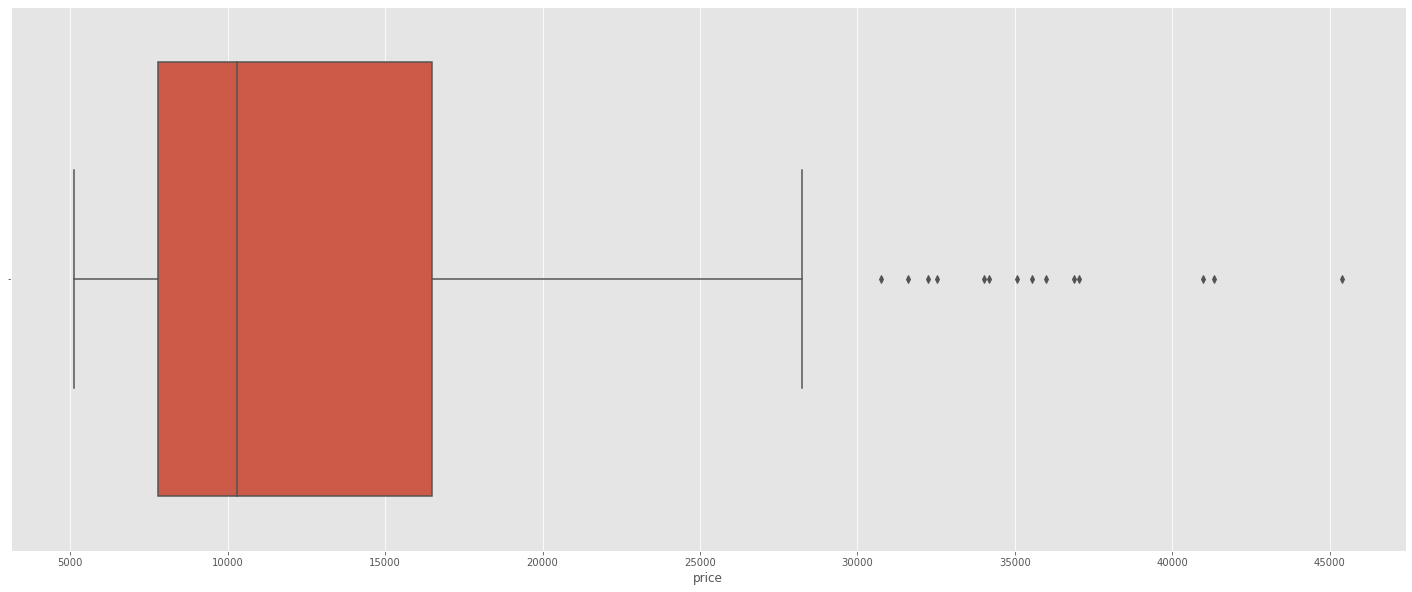

In [13]:
check_outlier_numerical_values(numerical)

In [78]:
def distplot_numerical_values(df):
    for i in df:
        fig,ax = plt.subplots(1,1,figsize=(25,10))
        sns.distplot(x=df[i])

In [79]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak-rpm           203 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    Int64  
dtypes: Int64(1), float64(10), 

In [102]:
numerical.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495
1,3.0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500
2,1.0,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450


In [97]:
categorical.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


<AxesSubplot:>

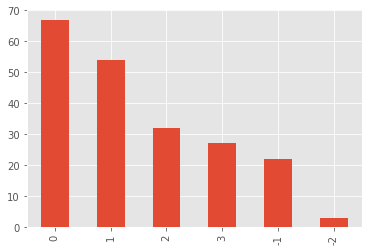

In [89]:
df.symboling.value_counts().plot(kind='bar')

C:\Users\Saurav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='symboling', ylabel='Density'>

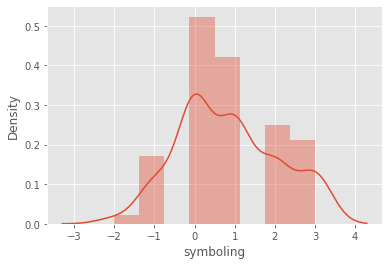

In [98]:
sns.distplot(df.symboling)

In [16]:
df.price.dtypes

Int64Dtype()

In [115]:
def capp_outliers(df):
    for i in df:
        if df[i].dtypes != 'O':
            percentile25 = df[i].quantile(0.25)
            percentile75 = df[i].quantile(0.75)

            iqr = percentile75 - percentile25

            upper_limit = percentile75 + 1.5*iqr
            lower_limit = percentile25 - 1.5*iqr

            df[i] = np.where(
            df[i] > upper_limit,upper_limit,
            np.where(
            df[i] < lower_limit,lower_limit,
            df[i]
            )
            )
        

    return df

In [116]:
df2 = capp_outliers(df)

In [157]:
num.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [162]:
df1 = num.copy()
df1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [32]:
num = df2.select_dtypes(exclude='object')
cat = df2.select_dtypes(include='object')
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    float64
 1   normalized-losses  159 non-null    float64
 2   wheel-base         159 non-null    float64
 3   length             159 non-null    float64
 4   width              159 non-null    float64
 5   height             159 non-null    float64
 6   curb-weight        159 non-null    float64
 7   engine-size        159 non-null    float64
 8   bore               159 non-null    float64
 9   stroke             159 non-null    float64
 10  compression-ratio  159 non-null    float64
 11  horsepower         159 non-null    float64
 12  peak-rpm           159 non-null    float64
 13  city-mpg           159 non-null    float64
 14  highway-mpg        159 non-null    float64
dtypes: float64(15)
memory usage: 19.9 KB


In [33]:
num.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
3,2.0,164.0,99.8,176.6,66.20,54.3,2337.0,109.0,3.19,3.4,10.0,102.0,5500.0,24.0,30.0
4,2.0,164.0,99.4,176.6,66.40,54.3,2824.0,136.0,3.19,3.4,8.0,115.0,5500.0,18.0,22.0
6,1.0,158.0,105.8,192.7,70.25,55.7,2844.0,136.0,3.19,3.4,8.5,110.0,5500.0,19.0,25.0
8,1.0,158.0,105.8,192.7,70.25,55.9,3086.0,131.0,3.13,3.4,8.3,140.0,5500.0,17.0,20.0
10,2.0,192.0,101.2,176.8,64.80,54.3,2395.0,108.0,3.50,2.8,8.8,101.0,5800.0,23.0,29.0


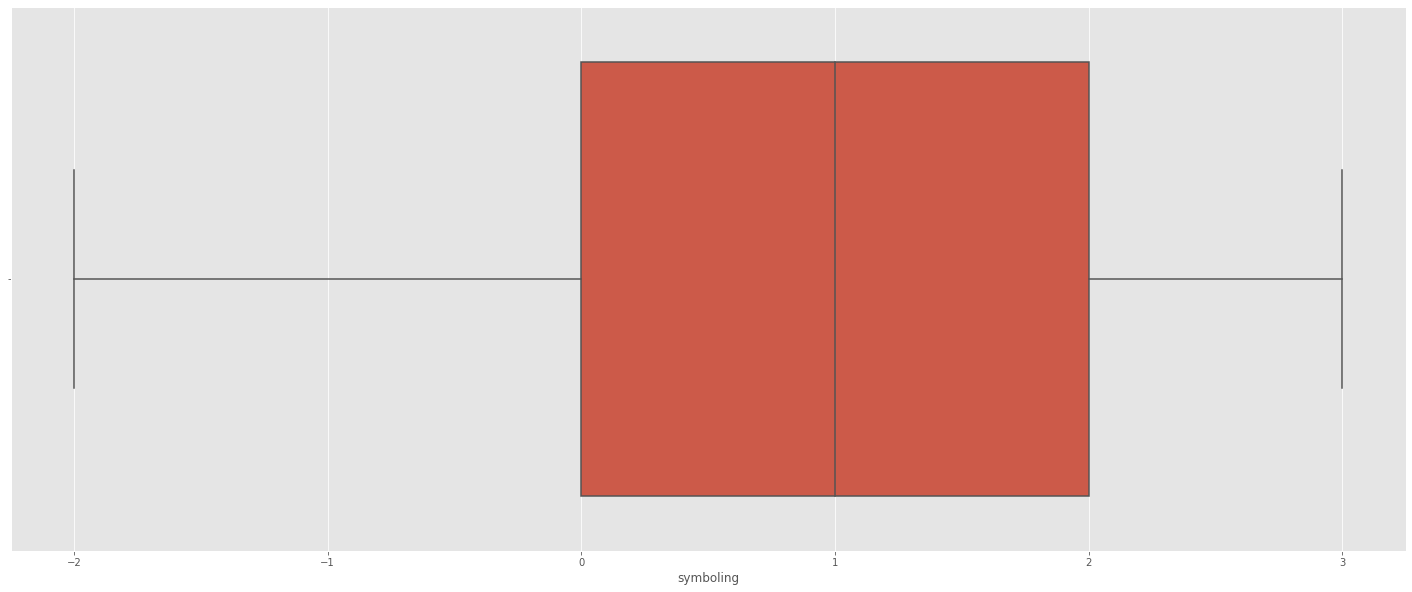

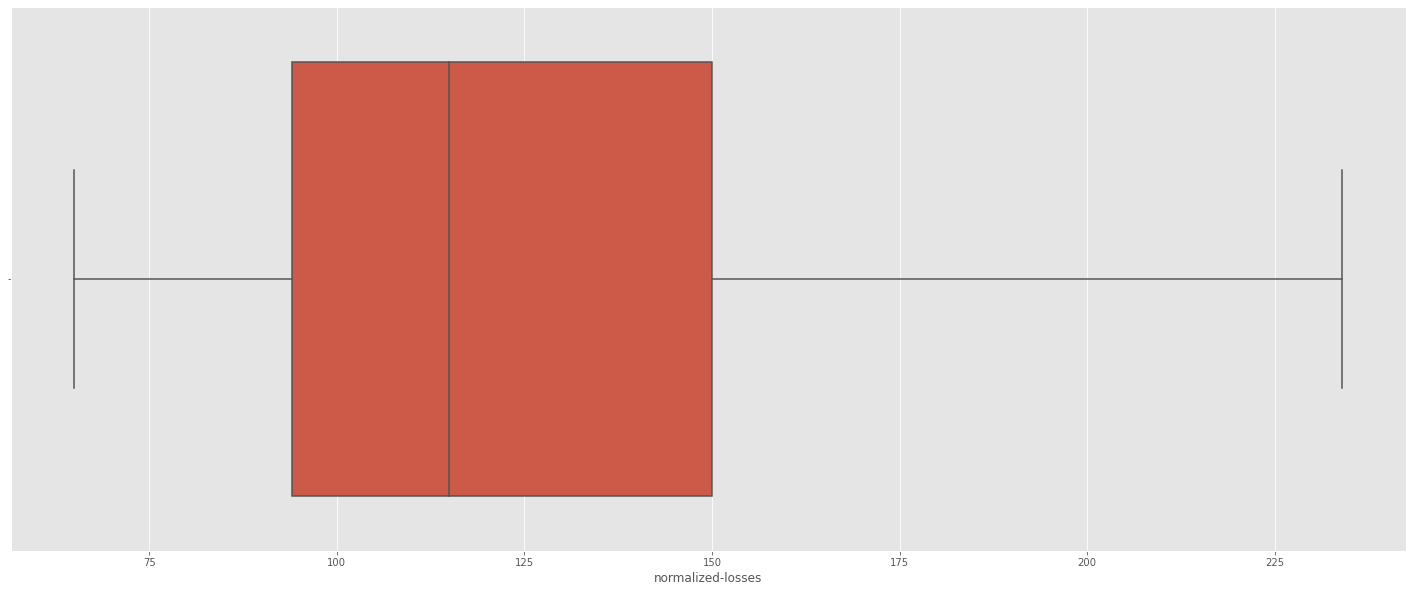

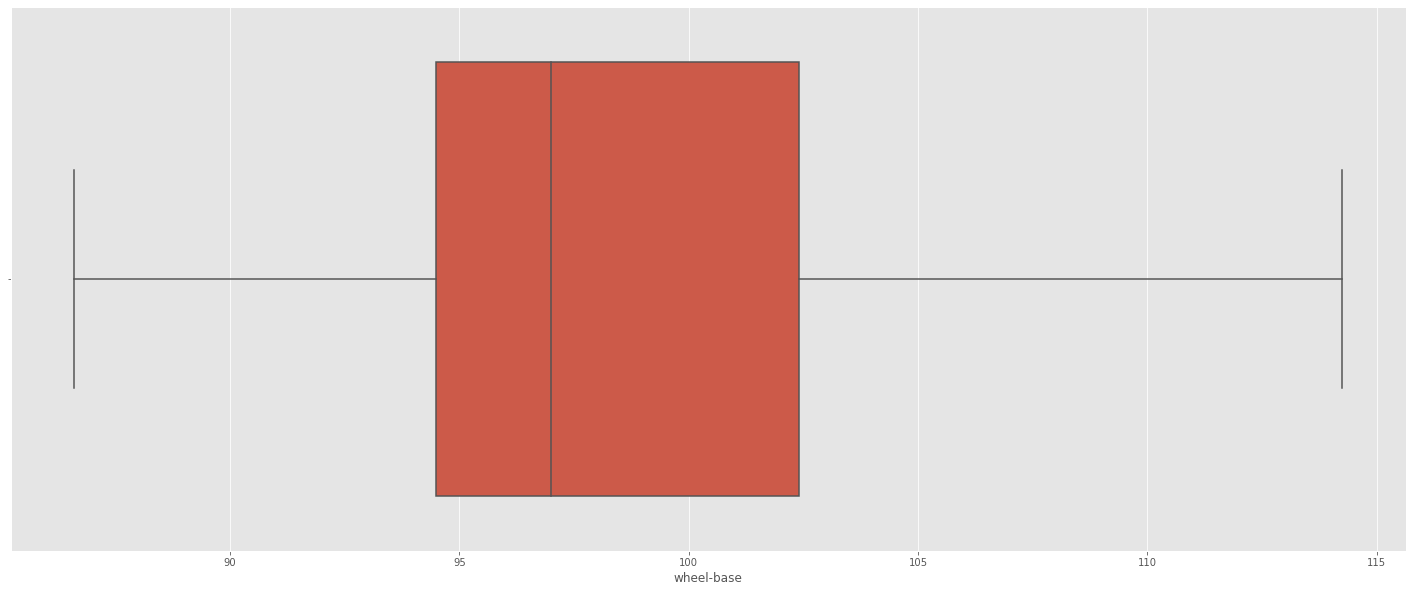

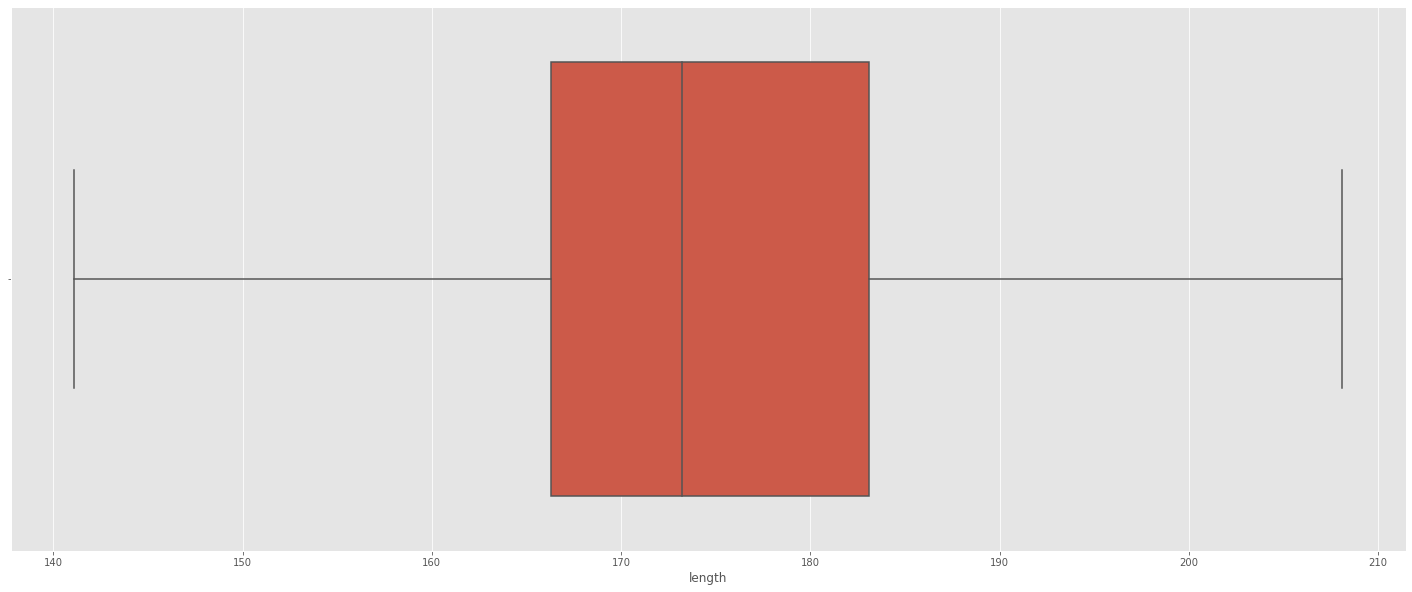

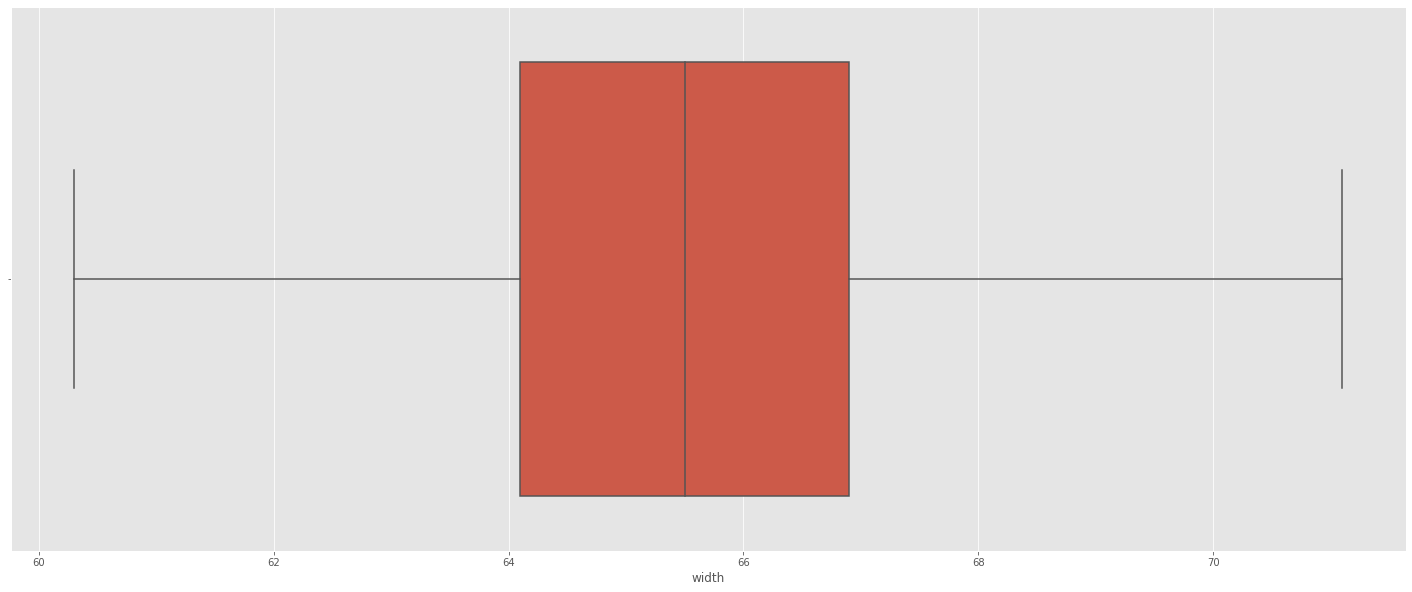

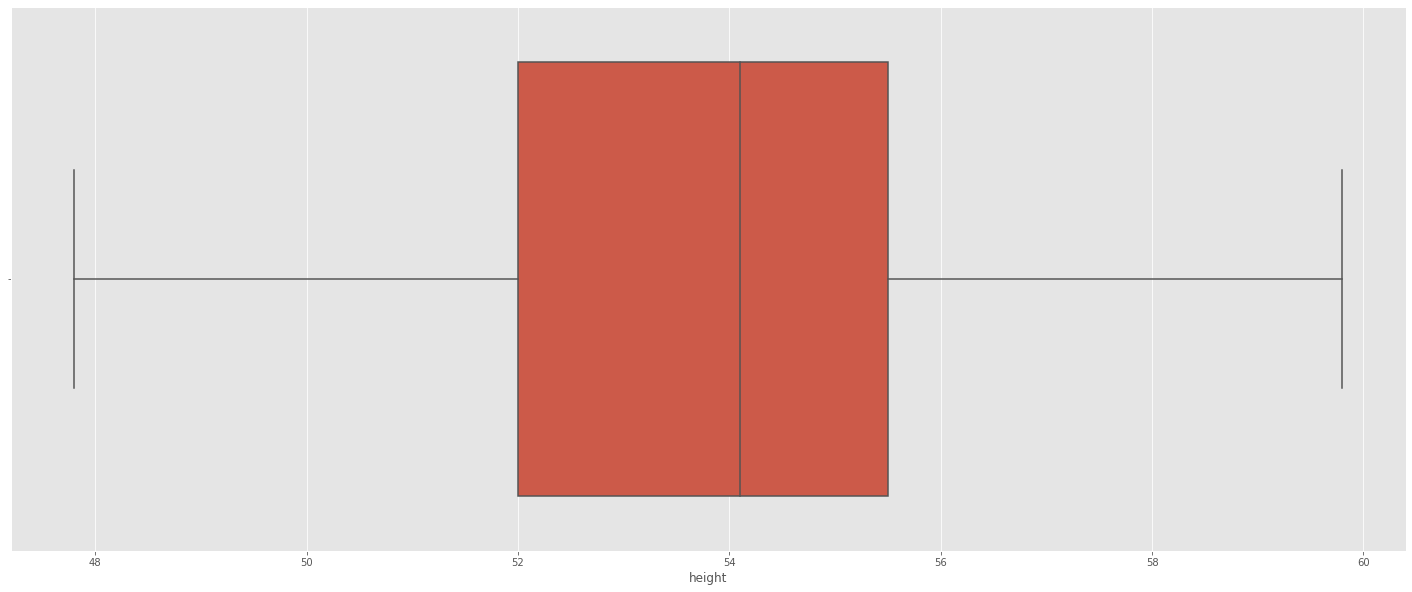

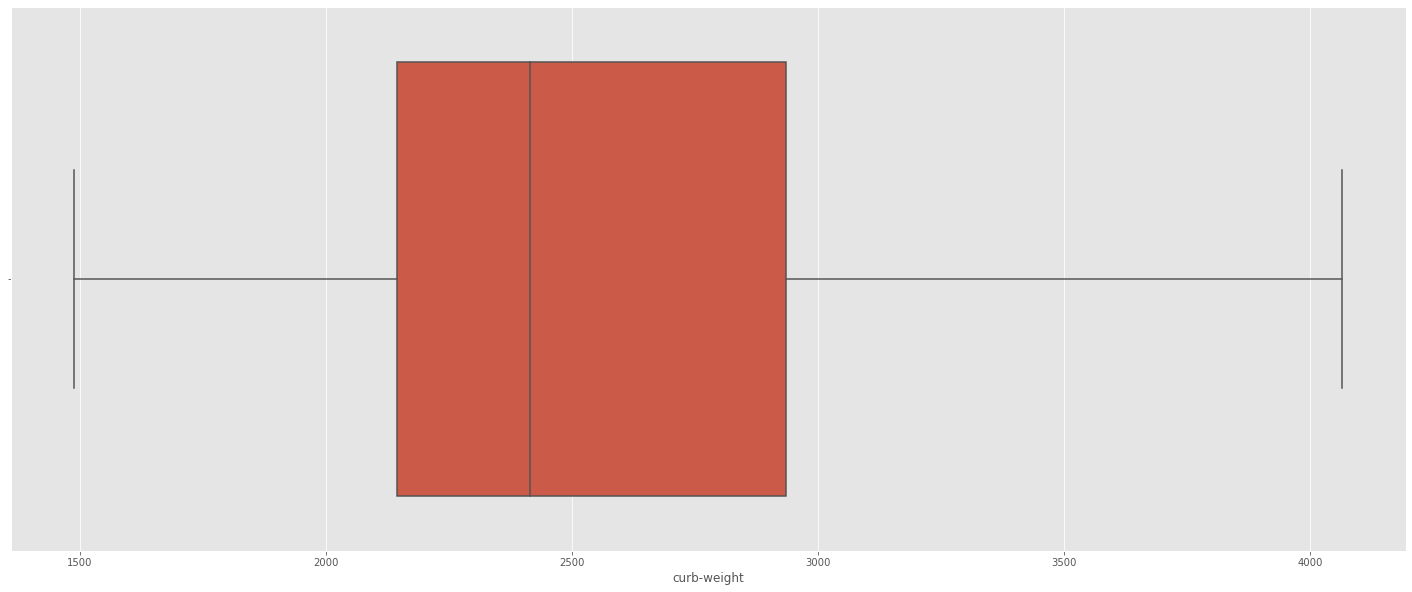

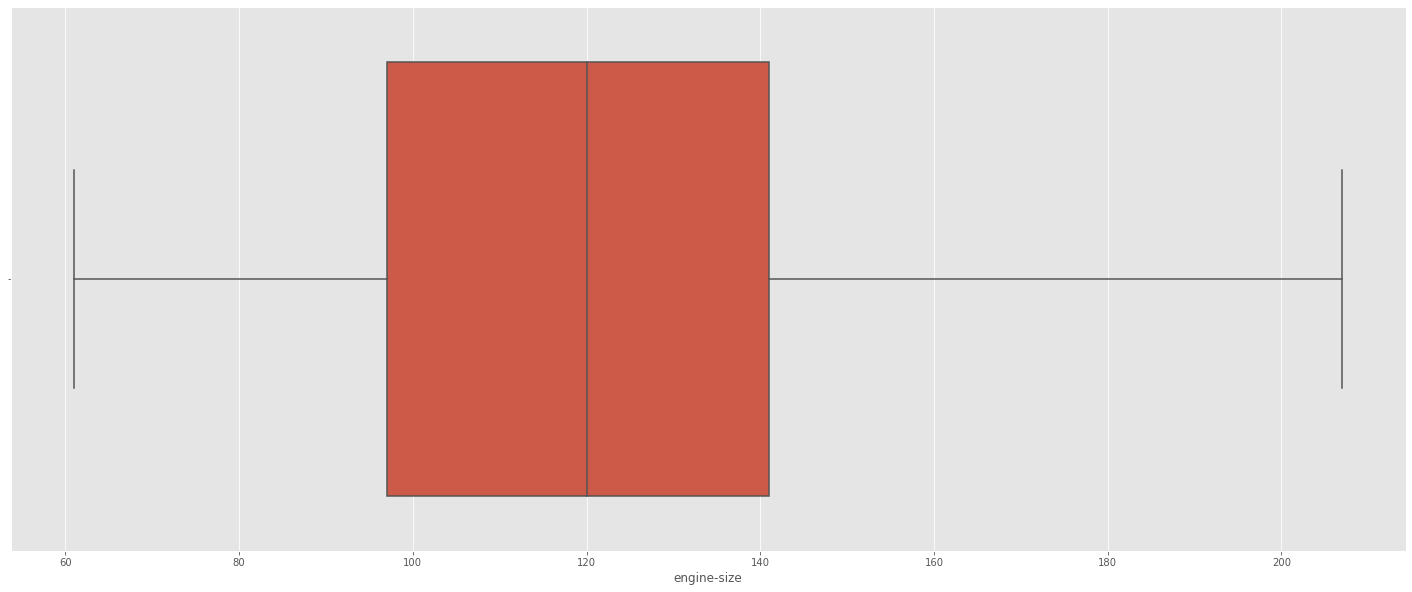

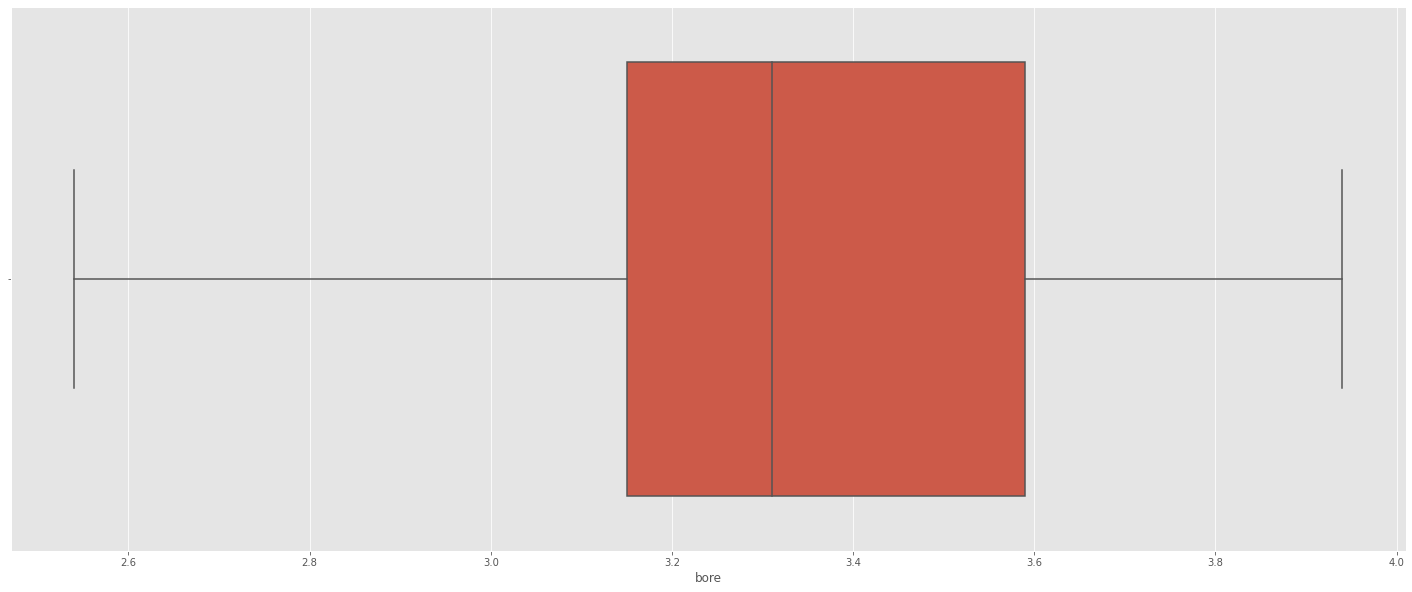

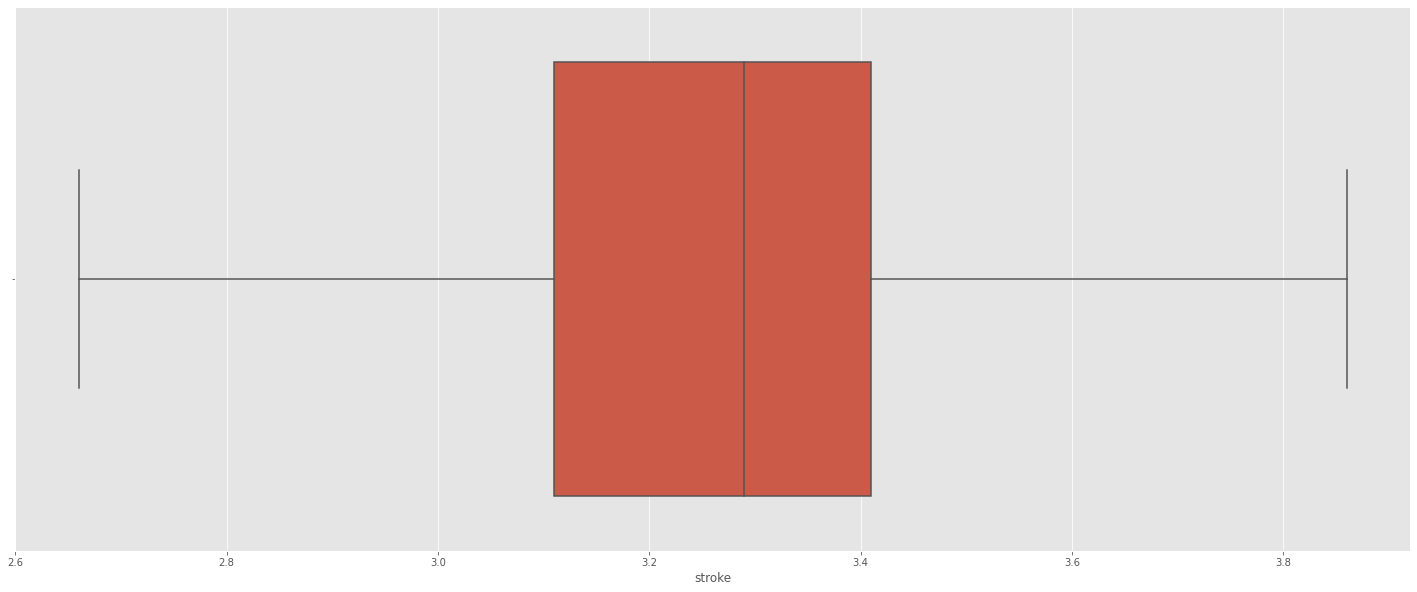

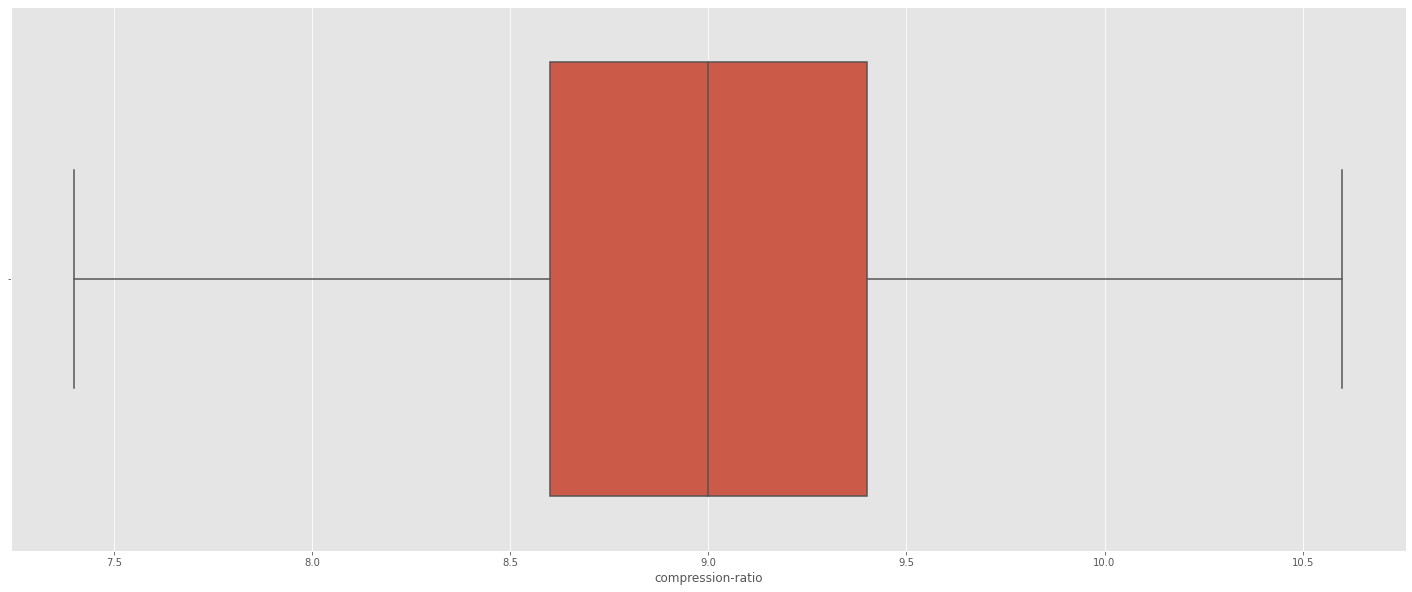

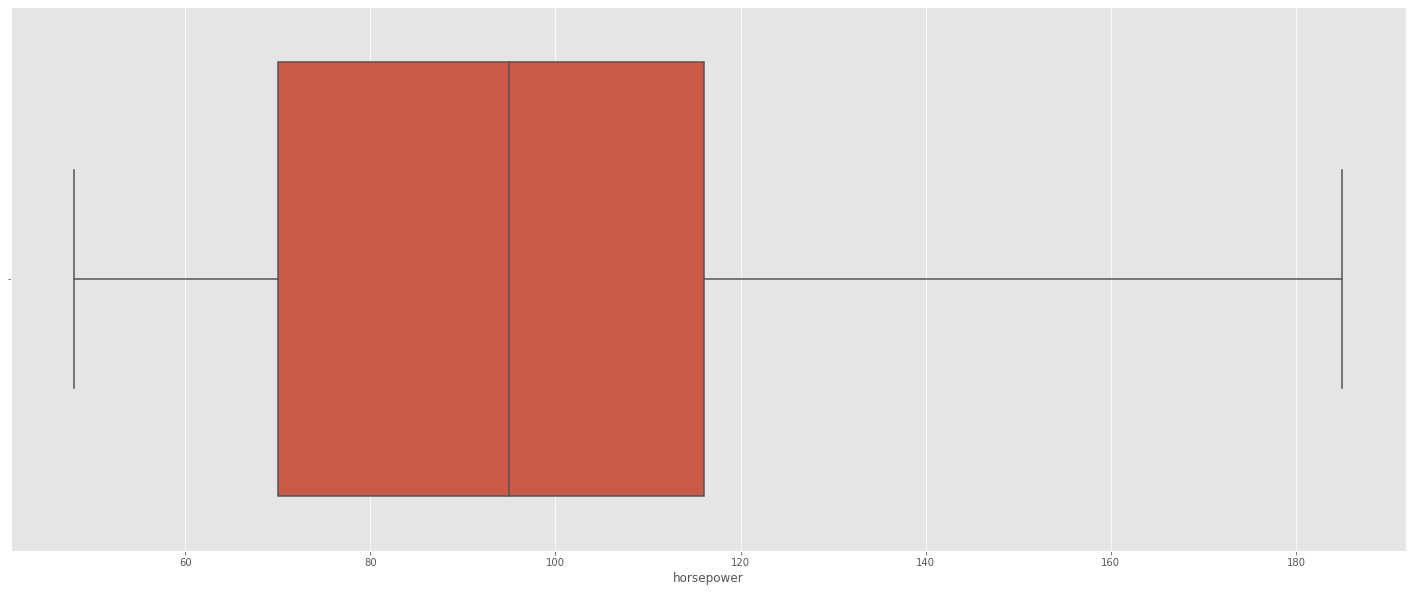

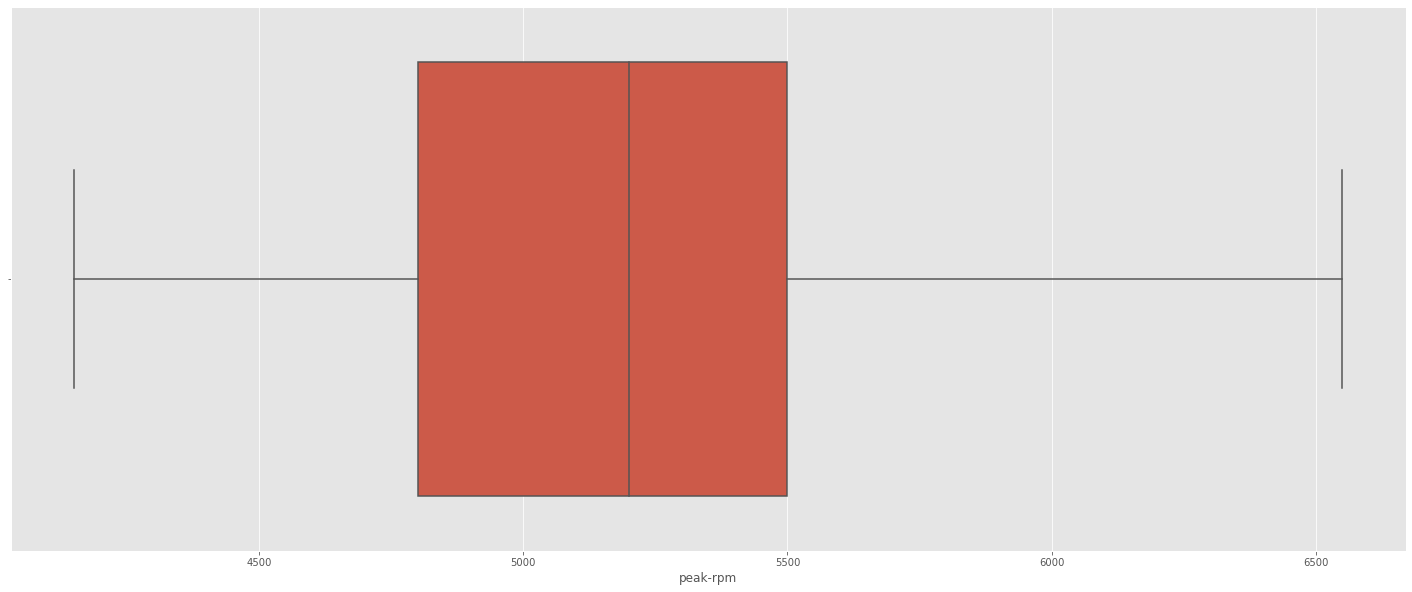

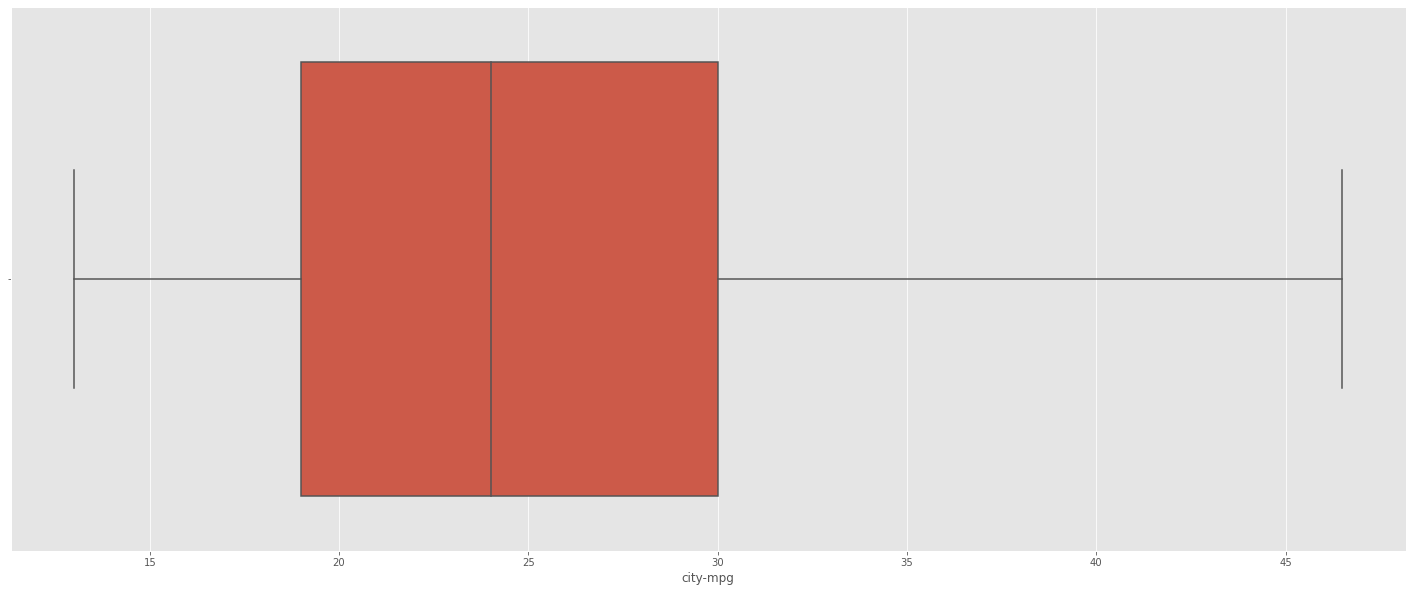

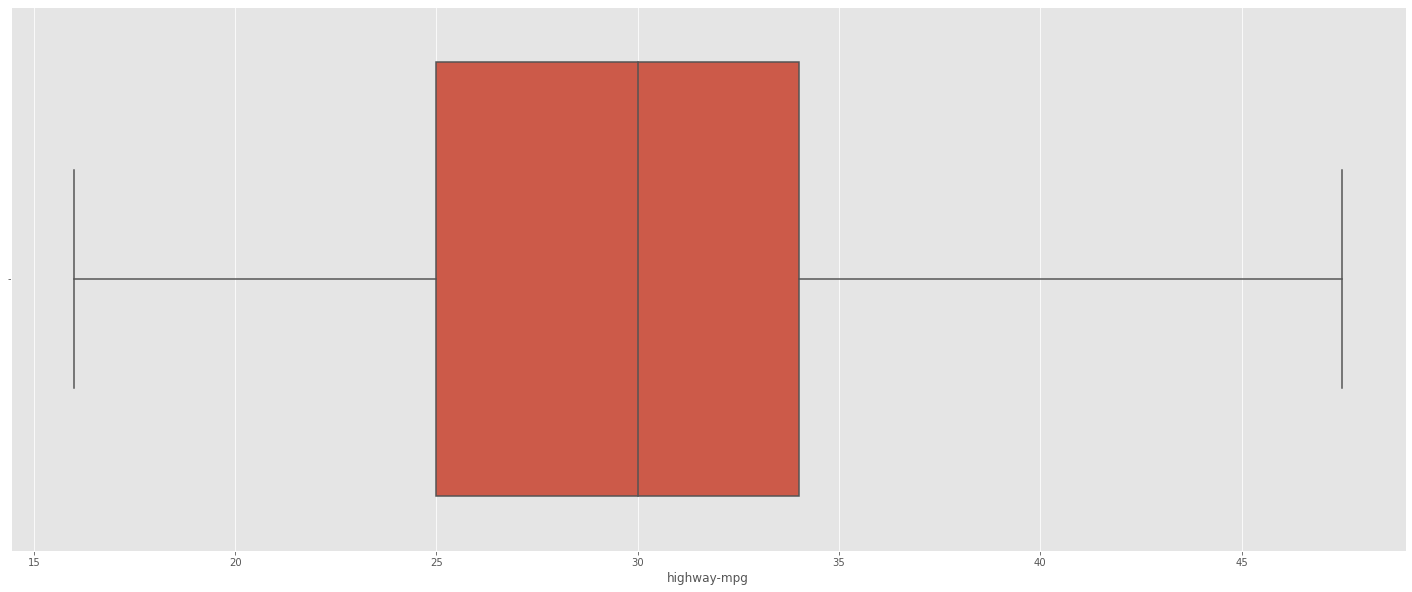

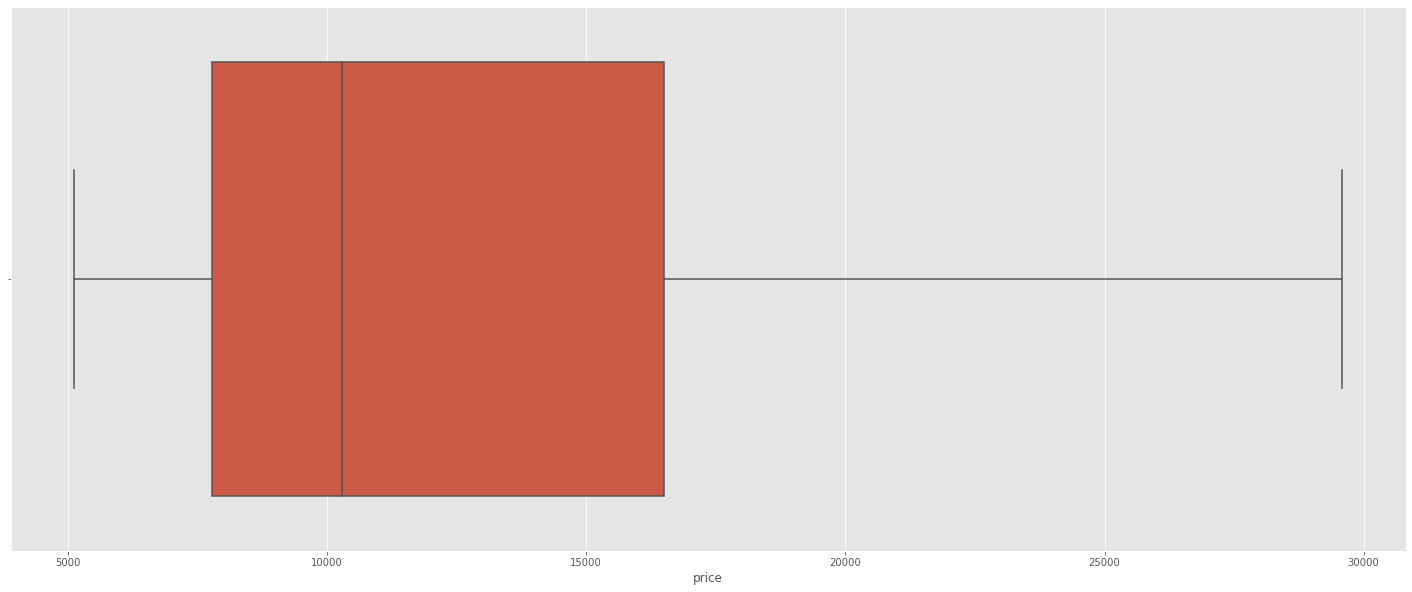

In [213]:
check_outlier_numerical_values(num)

In [106]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [107]:
categorical.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [134]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              205 non-null    object
 1   fuel-type         205 non-null    object
 2   aspiration        205 non-null    object
 3   num-of-doors      203 non-null    object
 4   body-style        205 non-null    object
 5   drive-wheels      205 non-null    object
 6   engine-location   205 non-null    object
 7   engine-type       205 non-null    object
 8   num-of-cylinders  205 non-null    object
 9   fuel-system       205 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


In [133]:
for i in categorical:
    print(categorical[i].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four' nan]
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [122]:
num.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [132]:
num.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [118]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [220]:
df3.replace([np.inf, -np.inf], np.nan, inplace=True)

### Model Splitting

In [117]:
X = df2.drop('price',axis=1)
y = df2.price

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [119]:
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
knn = KNNImputer(n_neighbors=2)
si = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown='ignore')
ss = StandardScaler()
lr = LinearRegression()

In [121]:
numeric_transformer = Pipeline(steps=[
    ('knn',knn),
    ('ss',ss)
])
categorical_transformer = Pipeline(steps=[
    ('si',si),
    ('ohe',ohe),
    
])

In [122]:
preprocessing = ColumnTransformer(transformers=[
    ('num',numeric_transformer,selector(dtype_exclude='object')),
    ('cat',categorical_transformer,selector(dtype_include='object'))
])

In [123]:
pipe = Pipeline(steps = [
    ('pp',preprocessing),
    ('lr',lr)
])

In [124]:
clf = pipe.fit(X_train,y_train)

In [125]:
y_pred = clf.predict(X_test)

In [126]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

In [127]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
rmse

1782.0731446844932

In [128]:
r2_score(y_test, y_pred)

0.8215312886730459